# Assignment 11

**Name:** Yehonatan Keypur


Thank you for taking the time to review my assignment. I appreciate your effort and feedback!

### Import Libraries and Dataset

**Overview of Libraries Used**<br>
In this section, we import essential Python libraries to perform data processing, visualization, and machine learning tasks:  
- **`numpy`**: Efficient numerical computations and handling multi-dimensional arrays.  
- **`pandas`**: Manipulates structured data for analysis.  
- **`sklearn.datasets.fetch_openml`**: Fetches the MNIST dataset for use in machine learning experiments.  
- **`sklearn.model_selection.train_test_split`**: Splits the dataset into training and testing subsets for model evaluation.  
- **`matplotlib.pyplot`**: Visualizes data through plots and charts.  
- **`seaborn`**: Creates aesthetically pleasing statistical graphics.  
- **`tqdm.notebook`**: Adds progress bars to loops in Jupyter Notebooks for better monitoring.  
- **`random`**: Generates random values for reproducibility or simulation tasks.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from tqdm.notebook import tqdm
import random

### Data Preperation

**Why Normalize the Data?**<br>
Normalization scales the pixel values of the MNIST images to fall within the range [0, 1]. This ensures that the model training process is efficient and numerical operations are stable. The code below achieves this by dividing pixel values by 255 (the maximum intensity value).  


**Dataset Description**<br>
- **Content**: 70,000 grayscale images of handwritten digits (0–9).
- **Size**: 28×28 pixels (784 features when flattened).  
- **Classes**: 10 distinct digit classes (0 to 9).  
- **Purpose**: Used for tasks like classification and feature extraction.




In [ ]:
# Load the data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Convert labels to integers
y = y.astype(int)

### Understanding the data

**Loading and Exploring the Dataset**<br>
We load the MNIST dataset and examine its structure to understand its dimensions and characteristics.

**Visualizing Sample Images**<br>
The following code displays `n_samples` randomly selected images from the dataset along with their corresponding labels.  

**Code Explanation**<br>
- **`plot_samples` Function**:
  - Reshapes each flattened 28×28 image back into its original 2D form for visualization.  
  - Displays each image using `imshow` with grayscale coloring.  
  - Adds labels for better context.  
- **Output**: A grid of digit images with their corresponding labels, helping us visually confirm the data's content.  

**Additional Dataset Information**:  
- The printed dataset shape (`X.shape`) reveals the number of samples and features (e.g., `(70000, 784)`).  
- Unique labels (`np.unique(y)`) ensure that all ten digit classes (0–9) are represented.  



In [ ]:
def plot_samples(X, y, n_samples=10):
    plt.figure(figsize=(10, 4))
    for i in range(n_samples):
        ax = plt.subplot(1, n_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {y[i]}',
            fontsize=10,
            pad=8,
            bbox=dict(facecolor='white',
                      edgecolor='gray',
                      alpha=0.8,
                      boxstyle='round,pad=0.2'))
        plt.axis('off')
    plt.show()

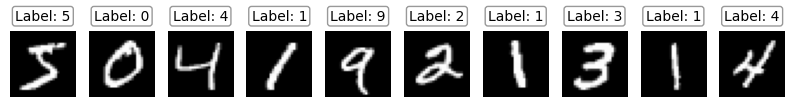

Dataset shape: (70000, 784)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Visualize Data
plot_samples(X, y)

# Inspect Data
print("Dataset shape:", X.shape)
print("Unique labels:", np.unique(y))

### Data Preparation Process

We now need to prepares the MNIST dataset for training a perceptron-based model by addressing several preprocessing steps.

**1. Splitting Data into Train/Test Sets**

- **Purpose**: Separates data into training and testing subsets to evaluate model performance on unseen data.
- **Key Parameters**:
  - `TEST_SIZE`: Specifies the proportion of the dataset used for testing (20% here).
  - `RANDOM_STATE`: Ensures reproducibility by controlling random splitting.
- **Dual Splits**:
  - First split for `X_train`, `X_test`, `y_train`, `y_test`.
  - Second split keeps original labels for later analysis (e.g., confusion matrices).


**2. Label Distribution Analysis**

- **Function `analyze_distributions`**:
  - Counts occurrences of each digit (0–9) in the training and testing datasets.
  - Displays the distribution, ensuring balanced representation of classes.
  - Useful for identifying potential data imbalances.

**3. Checking Missing Values**

- **Function `check_missing_values`**:
  - Counts NaN values in training and testing datasets.
  - Ensures data integrity; models perform poorly with missing data.
- **Output**:
  - Prints the number of missing values (ideally zero for MNIST).

**4. Visualizing Class Distributions**

- **Function `plot_distributions`**:
  - Compares digit distributions between training and testing datasets using bar plots.
  - Key Features:
    - Bars are labeled with counts.
    - Colors differentiate between training (blue-gray) and testing (red).
    - Customizations like gridlines and legends enhance clarity.
  - **Purpose**: Verifies dataset consistency, highlighting potential issues like class imbalance.




In [ ]:
TEST_SIZE = 0.2
RANDOM_STATE = 42

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )

# Also return original labels for confusion matrix
_, _, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )

We would like to analyze the dataset distribution.

In [ ]:
def analyze_distributions(y_train, y_test):
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    unique_test, counts_test = np.unique(y_test, return_counts=True)

    train_dist = dict(zip(unique_train, counts_train))
    test_dist = dict(zip(unique_test, counts_test))

    print("Training label distribution:", train_dist)
    print("Testing label distribution:", test_dist)

    return train_dist, test_dist

def check_missing_values(X_train, X_test):
    train_missing = np.isnan(X_train).sum()
    test_missing = np.isnan(X_test).sum()

    print(f"Missing values in training set: {train_missing}")
    print(f"Missing values in testing set: {test_missing}")

In [ ]:
# Analyze Label Distributions
train_dist, test_dist = analyze_distributions(y_train, y_test)

# Check for Missing Values
check_missing_values(X_train, X_test)

Training label distribution: {0: 5560, 1: 6277, 2: 5610, 3: 5708, 4: 5529, 5: 5040, 6: 5480, 7: 5790, 8: 5468, 9: 5538}
Testing label distribution: {0: 1343, 1: 1600, 2: 1380, 3: 1433, 4: 1295, 5: 1273, 6: 1396, 7: 1503, 8: 1357, 9: 1420}
Missing values in training set: 0
Missing values in testing set: 0


lets visualize it

In [ ]:
def plot_distributions(train_dist, test_dist):
    plt.style.use('ggplot')

    # Prepare data
    labels = sorted(train_dist.keys())
    train_counts = [train_dist[label] for label in labels]
    test_counts = [test_dist[label] for label in labels]

    plt.figure(figsize=(12, 7), dpi=100)

    bar_width = 0.35
    color1 = '#34495e'
    color2 = '#e74c3c'

    # Create bars
    r1 = np.arange(len(labels))
    r2 = [x + bar_width for x in r1]

    plt.bar(r1, train_counts, width=bar_width, label="Training Data",
            color=color1, alpha=0.85)
    plt.bar(r2, test_counts, width=bar_width, label="Testing Data",
            color=color2, alpha=0.85)
    plt.title('MNIST Digit Distribution in Datasets',
              fontsize=16, fontweight='medium', pad=20)
    plt.xlabel('Digit Class', fontsize=12, labelpad=10)
    plt.ylabel('Sample Count', fontsize=12, labelpad=10)
    plt.xticks([r + bar_width/2 for r in range(len(labels))],
               labels, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Customize legend
    plt.legend(loc='upper right', frameon=True, fontsize=10, framealpha=0.8, facecolor='white')

    # Add count values
    for i, v in enumerate(train_counts):
        plt.text(r1[i], v + (max(train_counts) * 0.01), str(v),
                ha='center', va='bottom', fontsize=9, color='#444444')
    for i, v in enumerate(test_counts):
        plt.text(r2[i], v + (max(test_counts) * 0.01), str(v),
                ha='center', va='bottom', fontsize=9, color='#444444')
    plt.tight_layout()
    plt.show()

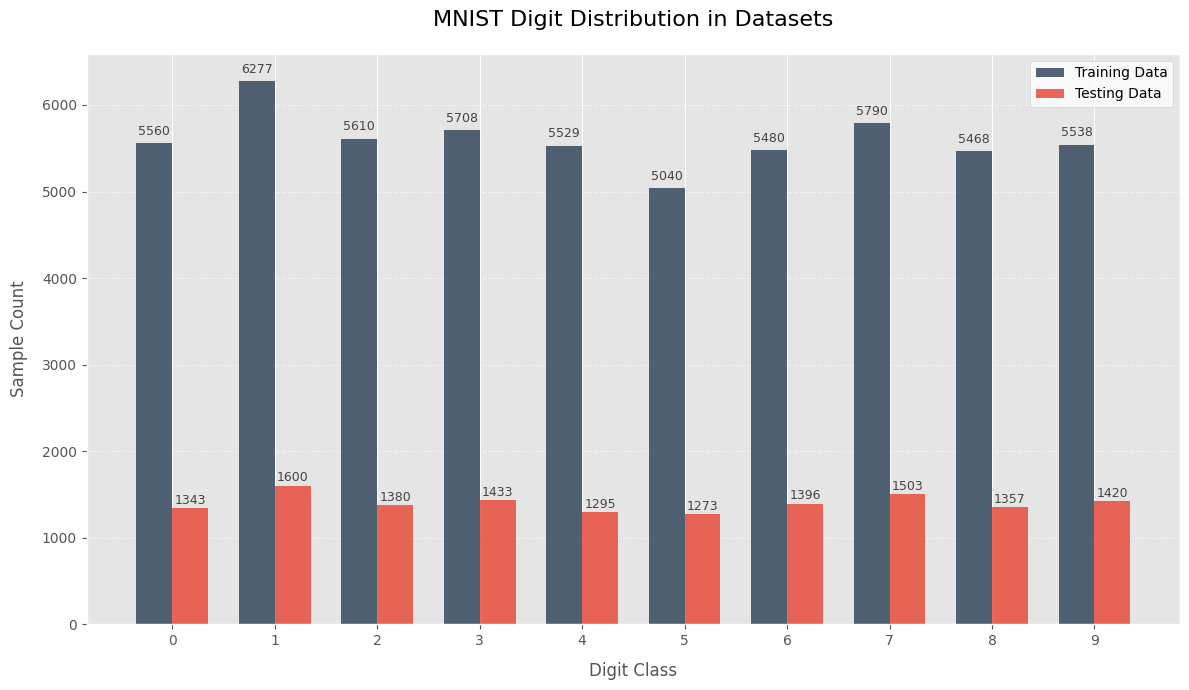

In [ ]:
plot_distributions(train_dist, test_dist)

#### Adding Bias Term

**Why?**  
Many linear models require a bias term (intercept) to enhance learning flexibility. Adding a bias simplifies handling the data's origin alignment.

**How?**  
  - We concatenate a column of ones to the feature matrix.
  - We verify addition through shape comparison and sample outputs.

**Example**:
  - Original shape: $(70000, 784)$ (for MNIST's 28×28 images).
  - After bias: $(70000, 785)$.


#### One-Hot Encoding Labels

**Purpose**  
Converts integer labels into a binary matrix, enabling compatibility with the multi-class perceptron algorithm.  
Example:  
$y = [2] \rightarrow [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$.

- **Steps**:  
  - Initialize a zero matrix with dimensions $(\text{samples}, \text{classes})$.
  - Set the appropriate column for each sample to 1 based on the original label.
- **Verification**:
  - Print the first 5 encoded rows to confirm the transformation.



In [ ]:
# Add Bias Term
X_original = X.copy()
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Verify Bias Term Addition
print("Original X shape:", X_original.shape)
print("\nX with bias term shape:", X.shape)
print("\nFirst 5 rows of X with bias term:\n", X[:5, :5])  # Display first 5 columns of first 5 rows

# Step 2: Convert Labels to One-Hot Encoding
y_onehot = np.zeros((len(y), 10))
y_onehot[np.arange(len(y)), y] = 1

# Verify One-Hot Encoding
print("\nOriginal y shape:", y.shape)
print("\ny_onehot shape:", y_onehot.shape)
print("\nFirst 5 one-hot encoded labels:\n", y_onehot[:5])

Original X shape: (70000, 784)

X with bias term shape: (70000, 785)

First 5 rows of X with bias term:
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]

Original y shape: (70000,)

y_onehot shape: (70000, 10)

First 5 one-hot encoded labels:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#### **Observations and Output Summary**

#### 1. **Distributions**:
 **Data Imbalance**
In the datasets we cab see that the class distributions are slightly imbalanced; some digits may appear more frequently than others.
- **Potential Issues**:
  - Class imbalance can lead to models biased toward predicting the majority classes.
  - For small or skewed datasets, the imbalance could significantly affect model performance.
- **Large Dataset Effect**:  
  - The dataset is a large dataset (70,000 samples). This scale often reduces the impact of class imbalance because even minority classes still have thousands of samples to train on.
  - This abundance provides enough examples for the model to learn meaningful patterns across all classes, reducing the immediate need for techniques like re-sampling or weighting.
- **Proportional Division**:  
  - In larger, more complex projects, ensuring proportional representation of classes during train-test splitting can further mitigate imbalance. So I might consider using stratified sampling, but in this project it seems unnecessary.

#### 2. **Missing Values**:
There are no missing values in the dataset. Confirms data cleanliness (no missing values in MNIST).
#### 3. **Bias Term and One-Hot Encoding**:
   - The inclusion of the bias term was successful.
   - The transformation of the label to match the perceptron model was the most successful.

This preprocessing pipeline ensures that the MNIST data is ready for training and testing with the multi-class perceptron algorithm.

---


#### Utility functions
We want to arrange the utility functions in one place for better general organization and readability, as well as to prevent misunderstandings and potential errors. This approach ensures a clear structure, facilitates reuse, and simplifies debugging, making the notebook more maintainable and easier to follow. Centralizing utility functions in a single location within a notebook or project significantly enhances organization and maintainability. These functions, which are foundational for tasks such as data preprocessing, evaluation, and visualization, benefit from such a structure as it minimizes redundancy, facilitates reusability, and ensures a clean, coherent workflow. Below is a detailed discussion of the included functions and their importance, along with an acknowledgment of my appreciation for aesthetically pleasing visualizations.

##### Importance of Centralizing Utility Functions
By consolidating utility functions:
- **Readability Improves**: A clearly defined structure helps collaborators and future readers of the notebook comprehend the workflow more easily.
- **Code Reuse**: Centralized utilities avoid duplication and encourage consistent methodology across experiments.
- **Debugging Simplifies**: Bugs in preprocessing, visualization, or metrics are easier to isolate when utilities are modular and self-contained.

##### Functions Explanation
##### **Data Preprocessing Functions**
- **`load_and_preprocess_data`**: Handles loading the MNIST dataset, reshaping it for linear classification, normalizing pixel intensities to `[0,1]`, and adding a bias term. This ensures input data is standardized and ready for subsequent model training.
- **`prepare_data`**: Provides a pipeline for fetching the MNIST dataset, normalizing features, converting labels to one-hot encoding, and splitting the data into training and testing sets. The function supports flexible test sizes and is an ideal reusable component.

#### 2. **Evaluation Metrics**
- **`confusion_matrix`**: Constructs a confusion matrix to quantify the performance of a classifier by comparing true and predicted labels.
- **`print_classifier_analysis`**: Calculates and displays precision, recall, and F1-scores for each digit class. These metrics offer important insights into model performance beyond simple accuracy.
- **`plot_confusion_matrix`**: Visualizes the confusion matrix using a heatmap, highlighting classification strengths and weaknesses intuitively.

#### 3. **Visualization Functions**
- **`plot_learning_curves`**: Creates a polished plot to depict training and testing error rates across iterations. It emphasizes trends in learning progress, aiding in hyperparameter tuning and model diagnosis.
- **`plot_confusion_matrix`**: Converts numeric confusion matrices into visual representations, using color gradients and annotations for clarity.
- **`plot_sensitivity_analysis`**: Analyzes true positive rates (sensitivity) for each class, presenting a bar plot to highlight disparities across digits.

In [ ]:
def load_and_preprocess_data():
    """Load and preprocess MNIST dataset."""
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape and normalize pixel values
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

    # Add bias term
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Convert labels to int type if needed
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    return X_train, X_test, y_train, y_test

def confusion_matrix(y_true, y_pred, num_classes):
    """
    Computes the confusion matrix for a multiclass classification task.

    Parameters:
    -----------
    y_true : array-like
        Ground truth (true) labels.
    y_pred : array-like
        Predicted labels.
    num_classes : int
        Number of classes.

    Returns:
    --------
    np.ndarray:
        Confusion matrix of shape (num_classes, num_classes),
        where cm[i, j] is the count of samples with true label i
        and predicted label j.
    """
    # Validate inputs
    y_true = np.asarray(y_true, dtype=int)
    y_pred = np.asarray(y_pred, dtype=int)

    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length.")

    if np.any(y_true < 0) or np.any(y_pred < 0) or \
       np.any(y_true >= num_classes) or np.any(y_pred >= num_classes):
        raise ValueError("Labels must be in the range [0, num_classes-1].")

    # Initialize the confusion matrix
    cm = np.zeros((num_classes, num_classes), dtype=int)

    # Populate the confusion matrix
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1

    return cm

def prepare_data(test_size=0.2):
    """
    Load and preprocess MNIST dataset:
    - Load data using fetch_openml
    - Normalize pixel values to [0,1]
    - Add bias term
    - Convert labels to one-hot encoding
    - Split into train/test sets
    """
    print("Loading MNIST dataset...")
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

    # Normalize features to [0,1]
    X = X / 255.0

    # Add bias term
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Convert labels to integers
    y = y.astype(int)

    # Convert to one-hot encoding
    y_onehot = np.zeros((y.shape[0], 10))
    y_onehot[np.arange(y.shape[0]), y] = 1

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_onehot, test_size=test_size, random_state=42
    )

    # Also return original labels for confusion matrix
    _, _, y_train_orig, y_test_orig = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    return X_train, X_test, y_train, y_test, y_train_orig, y_test_orig

def plot_learning_curves(model, model_details=None):
    """
    Visualizes the learning progress of a classification model using training
    and test error curves.

    Args:
        model: The trained model object containing attributes `training_errors`
               and `test_errors` to track error rates during training.
        model_details (dict, optional): Additional details about the model, such as
                                         name and number of epochs, for annotation.
    """
    # Set a custom color palette and grid-based visual theme
    color_palette = {
        'train': '#4B0082',  # Indigo for training error
        'test': '#FF6347'    # Tomato for test error
    }
    sns.set_theme(style="whitegrid")  # Apply a white grid theme for improved readability

    # Initialize the figure and axis with dimensions
    fig, ax = plt.subplots(figsize=(16, 12))

    # Plot training and test error curves
    ax.plot(model.training_errors, label='Training Error',
            linewidth=2, marker='.', markersize=4, color=color_palette['train'], alpha=0.8)
    ax.plot(model.test_errors, label='Test Error',
            linewidth=2, marker='.', markersize=4, color=color_palette['test'], alpha=0.8)

    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Limit number of x-axis ticks
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Limit number of y-axis ticks

    # Calculate average test error to include in the title
    avg_test_error = np.mean(model.test_errors)

    # Add a descriptive title and labels
    ax.set_title('MNIST Classification Learning Curves\n' +
                 f'Average Test Error: {avg_test_error:.3f}',
                 fontsize=16, fontweight='bold', color='#333333', pad=20)
    ax.set_xlabel('Iterations', fontsize=12, color='#555555')
    ax.set_ylabel('Error Rate', fontsize=12, color='#555555')

    # Add legend
    ax.legend(fontsize=10, frameon=True, facecolor='white',
             edgecolor='lightgray', loc='upper right')

    # Customize the background colors
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')

    # If additional model details are provided, display them as annotations
    if model_details:
        detail_text = (
            r"$\bf{Model\ Name:}$" + f" {model_details.get('model_name', 'PLA')}\n"
            r"$\bf{Epochs:}$" + f" {model_details.get('epochs', model.max_iter)}"
        )
        fig.text(
            0.02, 0.98, detail_text,
            ha='left', va='top', fontsize=8,
            color='#333333',
            bbox=dict(facecolor='white', edgecolor='lightgray',
                     boxstyle='round,pad=0.2', alpha=0.9),
            usetex=False
        )

    # Adjust layout to prevent overlap and display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_details=None):
    """
    Plots a confusion matrix to evaluate the classification performance visually.

    Args:
        y_true (numpy.ndarray): True labels of the dataset.
        y_pred (numpy.ndarray): Predicted labels by the model.
        model_details (dict, optional): Additional details about the model, such as
                                         name and epochs, for annotation.
    """
    sns.set_theme(style="whitegrid")  # Apply grid-based visual theme

    # Compute the confusion matrix and model accuracy
    cm = confusion_matrix(y_true, y_pred, num_classes=10)

    accuracy = np.mean(y_true == y_pred)

    # Initialize figure and axis dimensions
    fig, ax = plt.subplots(figsize=(12, 10))

    # Create a heatmap visualization for the confusion matrix
    sns.heatmap(cm,
                cmap='RdPu',  # Use "Red-Purple" color scheme
                square=True,  # Ensure cells are square
                linewidth=0.3,  # Add gridlines
                annot=True,  # Annotate cells with counts
                fmt='d',  # Display as integer format
                annot_kws={'size': 12})  # Style annotations

    # Add a title and axis labels
    plt.title('MNIST Digit Classification Results\n' +
             f'Overall Model Accuracy: {accuracy:.3f}',
             fontsize=16, fontweight='bold', color='#333333', pad=20)
    plt.xlabel('Predicted Digit Class', fontsize=12, color='#555555')
    plt.ylabel('True Digit Class', fontsize=12, color='#555555')

    # Customize plot spines and grid
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.tick_params(width=0.5, colors='#555555')
    ax.grid(True, linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)

    # Set background colors for plot and figure
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')

    # Add model details as annotations if provided
    if model_details:
        detail_text = (
            r"$\bf{Model\ Name:}$" + f" {model_details.get('model_name', 'PLA')}\n"
            r"$\bf{Epochs:}$" + f" {model_details.get('epochs', 'N/A')}"
        )
        fig.text(
            0.02, 0.98, detail_text,
            ha='left', va='top', fontsize=8,
            color='#333333',
            bbox=dict(facecolor='white', edgecolor='lightgray',
                     boxstyle='round,pad=0.2', alpha=0.9),
            usetex=False
        )

    # Adjust layout and display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def print_classifier_analysis(y_true, y_pred, model_name="Model"):
    """Print detailed classification metrics for each digit"""
    # Calculate confusion matrix
    n_classes = 10
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t][p] += 1

    # Calculate metrics for each class
    precisions = np.zeros(n_classes)
    recalls = np.zeros(n_classes)
    f_scores = np.zeros(n_classes)
    accuracies = np.zeros(n_classes)

    for i in range(n_classes):
        # True Positives: diagonal elements
        tp = cm[i][i]
        # False Positives: sum of column i (predicted i) minus true positives
        fp = np.sum(cm[:, i]) - tp
        # False Negatives: sum of row i (actual i) minus true positives
        fn = np.sum(cm[i, :]) - tp

        # Calculate precision and recall
        precisions[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recalls[i] = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Calculate F1 score (F-beta with beta=1)
        f_scores[i] = (2 * precisions[i] * recalls[i]) / (precisions[i] + recalls[i]) if (precisions[i] + recalls[i]) > 0 else 0

        # Calculate per-class accuracy
        total_class_samples = np.sum(cm[i, :])  # Total samples of class i
        accuracies[i] = tp / total_class_samples if total_class_samples > 0 else 0

    # Calculate overall accuracy
    overall_accuracy = np.sum(np.diag(cm)) / np.sum(cm)

    # Print results
    print(f"CLASSIFIER ANALYSIS FOR: \'{model_name}\':\n")

    print("PRECISION STATISTICS:")
    for i, p in enumerate(precisions):
        print(f"Digit {i} Precision: {p:.4f}")

    print("\nRECALL STATISTICS:")
    for i, r in enumerate(recalls):
        print(f"Digit {i} Recall: {r:.4f}")

    print("\nF1-SCORE METRICS BY DIGIT CLASS:")
    for i, f in enumerate(f_scores):
        print(f"Digit {i} F1-Score: {f:.4f}")

    print("\nACCURACY BY DIGIT CLASS:")
    for i, a in enumerate(accuracies):
        print(f"Digit {i} Accuracy: {a:.4f}")

    print(f"\nOVERALL MODEL PERFORMANCE:\nClassification Accuracy: {overall_accuracy:.4f}")

def plot_sensitivity_analysis(y_true, y_pred, model_name="Model"):
    """Plot sensitivity (TPR) analysis for each digit class"""
    # Calculate sensitivity for each class
    n_classes = 10
    sensitivities = np.zeros(n_classes)

    for i in range(n_classes):
        true_positives = np.sum((y_true == i) & (y_pred == i))
        false_negatives = np.sum((y_true == i) & (y_pred != i))
        sensitivities[i] = true_positives / (true_positives + false_negatives)

    # Set style
    sns.set_theme(style="whitegrid")

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create bar plot
    bars = ax.bar(range(n_classes), sensitivities,
                  color='skyblue', alpha=0.7)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

    # Customize plot
    ax.set_title(f'Sensitivity (True Positive Rate) by Digit Class\n{model_name}',
                 fontsize=14, pad=20)
    ax.set_xlabel('Digit Class', fontsize=12)
    ax.set_ylabel('Sensitivity (TPR)', fontsize=12)
    ax.set_xticks(range(n_classes))
    ax.set_ylim(0, 1.1)  # Set y-axis limit to accommodate value labels

    # Add mean line
    mean_sensitivity = np.mean(sensitivities)
    ax.axhline(y=mean_sensitivity, color='red', linestyle='--', alpha=0.5)
    ax.text(n_classes-1, mean_sensitivity, f'Mean: {mean_sensitivity:.3f}',
            ha='right', va='bottom', color='red')

    # Customize grid
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    return sensitivities

## **Part A: Perceptron Learning Algorithm**

### **Multiclass PLA V1 - Model Overview**

**Multi-class Perceptron and One-vs-All Strategy**<br>
The perceptron algorithm, initially designed for binary classification, is extended to multi-class problems using a **one-vs-all strategy**:  
- For each class $k$, the perceptron distinguishes between samples of that class (positive) and all others (negative).  
- This creates $C$ binary classifiers (where $C$ is the number of classes).  
- During prediction, the classifier assigns a sample to the class with the highest score (dot product of input and weights).  

**Update Rule**<br>
The perceptron updates its weights when a sample is misclassified:  
$$
w_{k} = w_{k} + y \cdot x
$$
Where:  
- $w_{k}$: Weights for class $k$.  
- $y$: Label $+1$ for positive class, $-1$ otherwise.  
- $x$: Feature vector of the misclassified sample.

**Pocket Algorithm**<br>
To handle non-linearly separable cases:  
- The **Pocket Algorithm** retains the best-performing weights (based on error) during training, ensuring stability even when convergence isn't guaranteed.


### **Model Implementation**

#### Model Structure and Mechanisms
The `MulticlassPerceptron_V1` class is designed for flexibility, modularity, and performance. Here's an explanation of its key elements:

1. **Attributes**:  
   - `weights` and `pocket_weights` track current and best weights for each class.  
   - `training_errors` and `test_errors` log error rates during training for analysis.  

2. **Initialization Choices**:  
   - Weight initialization starts at zero for simplicity and reproducibility.  
   - The `max_iter` parameter controls the maximum training epochs, balancing training time and performance.  

3. **Vectorization**:  
   - Operations like dot products and error calculations are vectorized for efficiency, especially given the high dimensionality of MNIST data.  

4. **Binary Label Conversion**:  
   - The `_get_binary_labels` method ensures each class's binary classification is seamlessly handled.  

5. **Error Calculation**:  
   - Error rates are computed as the proportion of misclassified samples, allowing easy comparison and pocket weight updates.  


#### **Code Summary**

The `MulticlassPerceptron_V1` implementation follows these key steps:  

1. **Weight Initialization**:  
   - Both current and pocket weights are initialized, ensuring a baseline for comparison.  

2. **Training Loop**:  
   - Each epoch processes all classes, updating weights and errors as necessary.  
   - Pocket weights are updated only when a better solution is found.  

3. **Prediction**:  
   - During inference, the class with the highest score is selected, ensuring consistency with the multi-class approach.  

4. **Sensitivity Calculation**:  
   - Evaluates performance per class, aiding in understanding the model's strengths and weaknesses.


#### **Reasoning Behind Design Choices**

- **Pocket Algorithm**:
- **Error Logging**: Provides insights into model behavior during training and testing phases.  
- **Progress Indicators**: Nested progress bars offer detailed feedback.
- **Vectorized Operations**:
---

#### **Approach Summary**

The implementation reflects a balance between simplicity (e.g., zero initialization) and advanced features (e.g., Pocket Algorithm). The model prioritizes interpretability, efficiency, and adaptability to real-world scenarios, aligning with modern best practices in machine learning.


In [ ]:
class MulticlassPerceptron_V1:
    """
    A multiclass perceptron implementation using the Pocket Algorithm.

    Attributes:
        n_classes (int): Number of target classes. Default is 10.
        max_iter (int): Maximum number of iterations for training. Default is 1000.
        weights (numpy.ndarray): Current weights for each class.
        pocket_weights (numpy.ndarray): Best weights (least error) retained for each class.
        best_errors (numpy.ndarray): Minimum errors recorded for each class.
        training_errors (list): List to track training error per epoch.
        test_errors (list): List to track test error per epoch.
        pocket_weights_history (list): List to track pocket weights per epoch.
    """
    def __init__(self, n_classes=10, max_iter=1000):
        self.n_classes = n_classes
        self.max_iter = max_iter
        self.weights = None  # To store current weights for each class
        self.pocket_weights = None  # To store best weights based on error
        self.best_errors = None  # To track the lowest errors for each class
        self.training_errors = []  # To log training error for each epoch
        self.test_errors = []  # To log test error for each epoch
        self.pocket_weights_history = []  # To log pocket weights for each epoch

    def _init_weights(self, n_features):
        """
        Initializes the weight matrices and pocket weights.

        Args:
            n_features (int): Number of features in the input data.
        """
        # Initialize weights to zero for all classes and features
        # Creates a matrix of shape (number of classes, number of features)
        self.weights = np.zeros((self.n_classes, n_features))

        # Pocket weights start as a copy of the initial weights
        self.pocket_weights = self.weights.copy()

        # Initial best errors set to 1.0 (worst case scenario - all misclassified)
        # This is an array with one element per class
        self.best_errors = np.ones(self.n_classes)

    def _get_binary_labels(self, y):
        """
        Converts one-hot encoded labels into binary labels for all classes simultaneously.

        Args:
            y (numpy.ndarray): One-hot encoded labels.

        Returns:
            numpy.ndarray: Binary labels of shape (n_samples, n_classes).
        """
        return 2 * y - 1  # Convert 1 to +1 and 0 to -1 for all classes

    def _calculate_errors(self, X, y, weights):
        """
        Calculates the classification errors for all classes simultaneously.

        Args:
            X (numpy.ndarray): Input data.
            y (numpy.ndarray): One-hot encoded labels.
            weights (numpy.ndarray): Weights used for prediction.

        Returns:
            numpy.ndarray: Fraction of misclassified samples per class.
        """
        binary_y = self._get_binary_labels(y) # Binary labels for current class
        scores = X @ weights.T # Compute scores as dot product of X and weights
        predictions = np.where(scores > 0, 1, -1) # Predict class based on sign of scores
        return np.mean(predictions != binary_y, axis=0) # Calculate proportion of predictions

    def fit(self, X_train, y_train, X_test, y_test):
        """
        Trains the perceptron model using the Pocket Algorithm.

        Args:
            X_train (numpy.ndarray): Training data matrix of shape (n_samples, n_features).
            y_train (numpy.ndarray): One-hot encoded training labels.
            X_test (numpy.ndarray): Test data matrix.
            y_test (numpy.ndarray): One-hot encoded test labels.
        """
        n_samples, n_features = X_train.shape # Get number of samples and features
        self._init_weights(n_features) # Initialize weights

        progress_bar = tqdm(range(self.max_iter), desc="Training Progress", unit="epoch", leave=True, position=0)

        for iteration in progress_bar:
            # Compute scores and determine misclassified samples for all classes
            binary_y_train = self._get_binary_labels(y_train) # Binary labels for the current class
            scores = X_train @ self.weights.T
            misclassified = (scores * binary_y_train <= 0)  # Shape: (n_samples, n_classes)

            # Nested progress bar for processing each class
            class_progress = tqdm(range(self.n_classes), desc="Processing Classes", unit="class", leave=False, position=1)

            # Update weights for misclassified samples
            for class_idx in class_progress:
                if np.any(misclassified[:, class_idx]):
                    update_idx = np.where(misclassified[:, class_idx])[0][0]
                    self.weights[class_idx] += binary_y_train[update_idx, class_idx] * X_train[update_idx]

            # Calculate errors for all classes
            current_errors = self._calculate_errors(X_train, y_train, self.weights)
            improved_mask = current_errors < self.best_errors

            # Update pocket weights where errors improved
            self.pocket_weights[improved_mask] = self.weights[improved_mask].copy()
            self.best_errors[improved_mask] = current_errors[improved_mask]

            # Calculate and log training and test errors
            avg_train_error = np.mean(self.best_errors)
            avg_test_error = np.mean(self._calculate_errors(X_test, y_test, self.pocket_weights))

            self.training_errors.append(avg_train_error)
            self.test_errors.append(avg_test_error)

            if iteration % 100 == 0:
                self.pocket_weights_history.append(self.pocket_weights.copy())

            progress_bar.set_postfix({'Train Error': f'{avg_train_error:.4f}', 'Test Error': f'{avg_test_error:.4f}'})

    def predict(self, X):
        """
        Predicts the class labels for input samples using the best weights.

        Args:
            X (numpy.ndarray): Input data of shape (n_samples, n_features).

        Returns:
            numpy.ndarray: Predicted class labels.
        """
        scores = X @ self.pocket_weights.T # Compute scores for all classes
        return np.argmax(scores, axis=1) # Select class with highest score

    def calculate_sensitivity(self, X, y_true):
        """
        Calculates sensitivity (TPR) for each class.

        Args:
            X (numpy.ndarray): Input data of shape (n_samples, n_features).
            y_true (numpy.ndarray): True class labels as a 1D array.

        Returns:
            numpy.ndarray: Sensitivity values for each class.
        """
        y_pred = self.predict(X)
        sensitivities = np.zeros(self.n_classes)

        for i in range(self.n_classes):
            true_positives = np.sum((y_true == i) & (y_pred == i))
            false_negatives = np.sum((y_true == i) & (y_pred != i))
            sensitivities[i] = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

        return sensitivities


#### **Model Expectations**
Before running the model let's examine our expectations of the model and what might happen
###### **Challenges with PLA (Perceptron Learning Algorithm)**
- **Multi-Class Complexity**:
  - PLA is designed for linear classification, and handling multi-class problems involves converting them into multiple binary classification tasks (e.g., using a one-vs-all strategy).
  - Each binary classifier learns to distinguish one class from all others, but this increases the number of decision boundaries and heightens the chances of conflicts between them.
  
- **Data Linearity**:
  - PLA assumes data is linearly separable. However, MNIST's digit classes are not perfectly linearly separable in the feature space, especially for similar digits (e.g., '3' vs. '8').
  - The lack of flexibility in PLA's decision boundaries likely means that it will fail to fully classify such data accurately.

###### **Expected Behavior During Training**
- **Convergence Likelihood**:
  - Due to the linear nature of PLA, it is unlikely to converge on MNIST. Non-linearly separable regions in the data will prevent the algorithm from finding a consistent weight vector for all samples.
  - The model may oscillate between solutions or settle on suboptimal weights, leading to higher error rates.

- **Error Trends**:
  - **Training Error**: Likely to decrease initially but plateau at a significant value due to the inability to separate classes perfectly.
  - **Test Error**: Expected to remain high, reflecting the model's limited generalization ability for MNIST.

---

Now, let's create and instance of the model and run it:

In [ ]:
def load_and_preprocess_data2(test_size=0.2):
    """
    Load and preprocess MNIST dataset:
    - Load data using fetch_openml
    - Normalize pixel values to [0,1]
    - Add bias term
    - Convert labels to one-hot encoding
    - Split into train/test sets
    """
    print("Loading MNIST dataset...")
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

    # Normalize features to [0,1]
    X = X / 255.0

    # Add bias term
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Convert labels to integers
    y = y.astype(int)

    # Convert to one-hot encoding
    y_onehot = np.zeros((y.shape[0], 10))
    y_onehot[np.arange(y.shape[0]), y] = 1

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_onehot, test_size=test_size, random_state=42
    )

    # Also return original labels for confusion matrix
    _, _, y_train_orig, y_test_orig = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    return X_train, X_test, y_train, y_test, y_train_orig, y_test_orig

In [ ]:
# Prepare the data again in an orderly manner to ensure correct loading of the data
X_train, X_test, y_train, y_test, y_train_orig, y_test_orig = prepare_data()

# Set max_iter=500 as testing showed no significant improvement beyond this point.
max_iter = 500
pla_model_name = "Perceptron Learning Algorithm V1"

# Model details (for the plots)
pla_model_details = {
    'model_name': pla_model_name,
    'epochs': max_iter
}

# Create and train model
pla_model = MulticlassPerceptron_V1(max_iter=max_iter)

print("Training model...")
pla_model.fit(X_train, y_train, X_test, y_test)

# Make predictions
pla_y_pred = pla_model.predict(X_test)

Loading MNIST dataset...
Training model...


Training Progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

Processing Classes:   0%|          | 0/10 [00:00<?, ?class/s]

#### **Model: Multiclass PLA V1 - Results**
For the following steps, we will be utilizing functions from the utility section to streamline our process.

**Classifier Analysis**<br>
We will now display the results of the classifier analysis to assess the performance metrics such as accuracy, precision, recall, and F1 score. This will provide us with a comprehensive overview of the classifier's effectiveness.

In [ ]:
# Print classifier analysis
print_classifier_analysis(y_test_orig, pla_y_pred, model_name=pla_model_name)

CLASSIFIER ANALYSIS FOR: 'Perceptron Learning Algorithm V1':

PRECISION STATISTICS:
Digit 0 Precision: 0.9315
Digit 1 Precision: 0.9369
Digit 2 Precision: 0.8586
Digit 3 Precision: 0.8096
Digit 4 Precision: 0.8092
Digit 5 Precision: 0.7839
Digit 6 Precision: 0.8767
Digit 7 Precision: 0.8976
Digit 8 Precision: 0.8444
Digit 9 Precision: 0.7848

RECALL STATISTICS:
Digit 0 Recall: 0.9419
Digit 1 Recall: 0.9556
Digit 2 Recall: 0.8667
Digit 3 Recall: 0.8221
Digit 4 Recall: 0.8286
Digit 5 Recall: 0.7636
Digit 6 Recall: 0.9370
Digit 7 Recall: 0.8982
Digit 8 Recall: 0.6957
Digit 9 Recall: 0.8190

F1-SCORE METRICS BY DIGIT CLASS:
Digit 0 F1-Score: 0.9367
Digit 1 F1-Score: 0.9462
Digit 2 F1-Score: 0.8626
Digit 3 F1-Score: 0.8158
Digit 4 F1-Score: 0.8188
Digit 5 F1-Score: 0.7736
Digit 6 F1-Score: 0.9058
Digit 7 F1-Score: 0.8979
Digit 8 F1-Score: 0.7628
Digit 9 F1-Score: 0.8015

ACCURACY BY DIGIT CLASS:
Digit 0 Accuracy: 0.9419
Digit 1 Accuracy: 0.9556
Digit 2 Accuracy: 0.8667
Digit 3 Accuracy: 0.8

The performance metrics for the Perceptron Learning Algorithm (PLA) on the multi-class classification task reveal several key insights about the model's behavior and effectiveness:

**Precision, Recall, and F1-Score Distribution:**<br>
   - The precision values across the different digit classes show variation, with higher precision for digits 1, 0, and 7, while digits like 5, 3, and 4 have notably lower precision values. This suggests that the model is more accurate in predicting certain digits, particularly those with more distinct features, while struggling more with others, possibly due to class imbalance or similar features between certain digits.
   - Recall values follow a similar pattern, with high recall for digits 1, 0, and 6, but a significant drop in recall for digits 8 and 5. The model struggles more to identify certain digits, particularly 8, which likely indicates that there is a significant challenge in distinguishing these digits from others in the dataset.
   - The F1-scores, which balance precision and recall, confirm these trends. The F1-scores for digits 1 and 0 are the highest, while digits 5, 8, and 9 have relatively lower F1-scores, highlighting that the model performs well on some digits but faces difficulties with others.

**Overall Model Performance:**<br>
The overall classification accuracy suggests that the model is surprisingly effective for this task, though there is still room for improvement. The model’s ability to correctly classify most digits is decent, but it is clear that certain digits (like 8 and 5) lead to significant misclassifications.
   
**Analysis of Accuracy:**<br>
The accuracy per digit mirrors the patterns in precision and recall, with digits 1, 0, and 6 having high accuracy, while digits like 8 and 5 show lower accuracy. This indicates that, although the model can accurately classify certain digits, it struggles with others, likely due to the lack of flexibility in the PLA to capture more complex decision boundaries for those specific digits.

**Potential Causes and Areas for Improvement:**<br>
   - The Perceptron Learning Algorithm, while effective for simpler problems, might not be complex enough to capture the nuanced relationships in the multi-class classification task. The results suggest that the PLA could benefit from a more sophisticated model, such as a multi-layer perceptron (MLP), that is better suited to handle the intricacies of multi-class classification, especially for digits with similar visual features or those that are less distinct.
   - Additionally, addressing class imbalances through methods like class weighting, data augmentation, or more advanced regularization techniques could further improve the model’s performance, especially for underperforming classes like digit 8.

In conclusion, the PLA demonstrates surprisingly solid performance overall, but there is significant variability across different digit classes, with certain digits being more challenging for the model to classify correctly. Implementing a more flexible model, addressing data imbalances, or refining the decision boundaries could lead to better generalization and accuracy across all digit classes.

**Learning Curves**<br>
At this point, we will generate visualizations of the results. Plotting allows us to better understand the distribution of data, model performance, and any patterns or insights that may not be immediately apparent in the raw data.

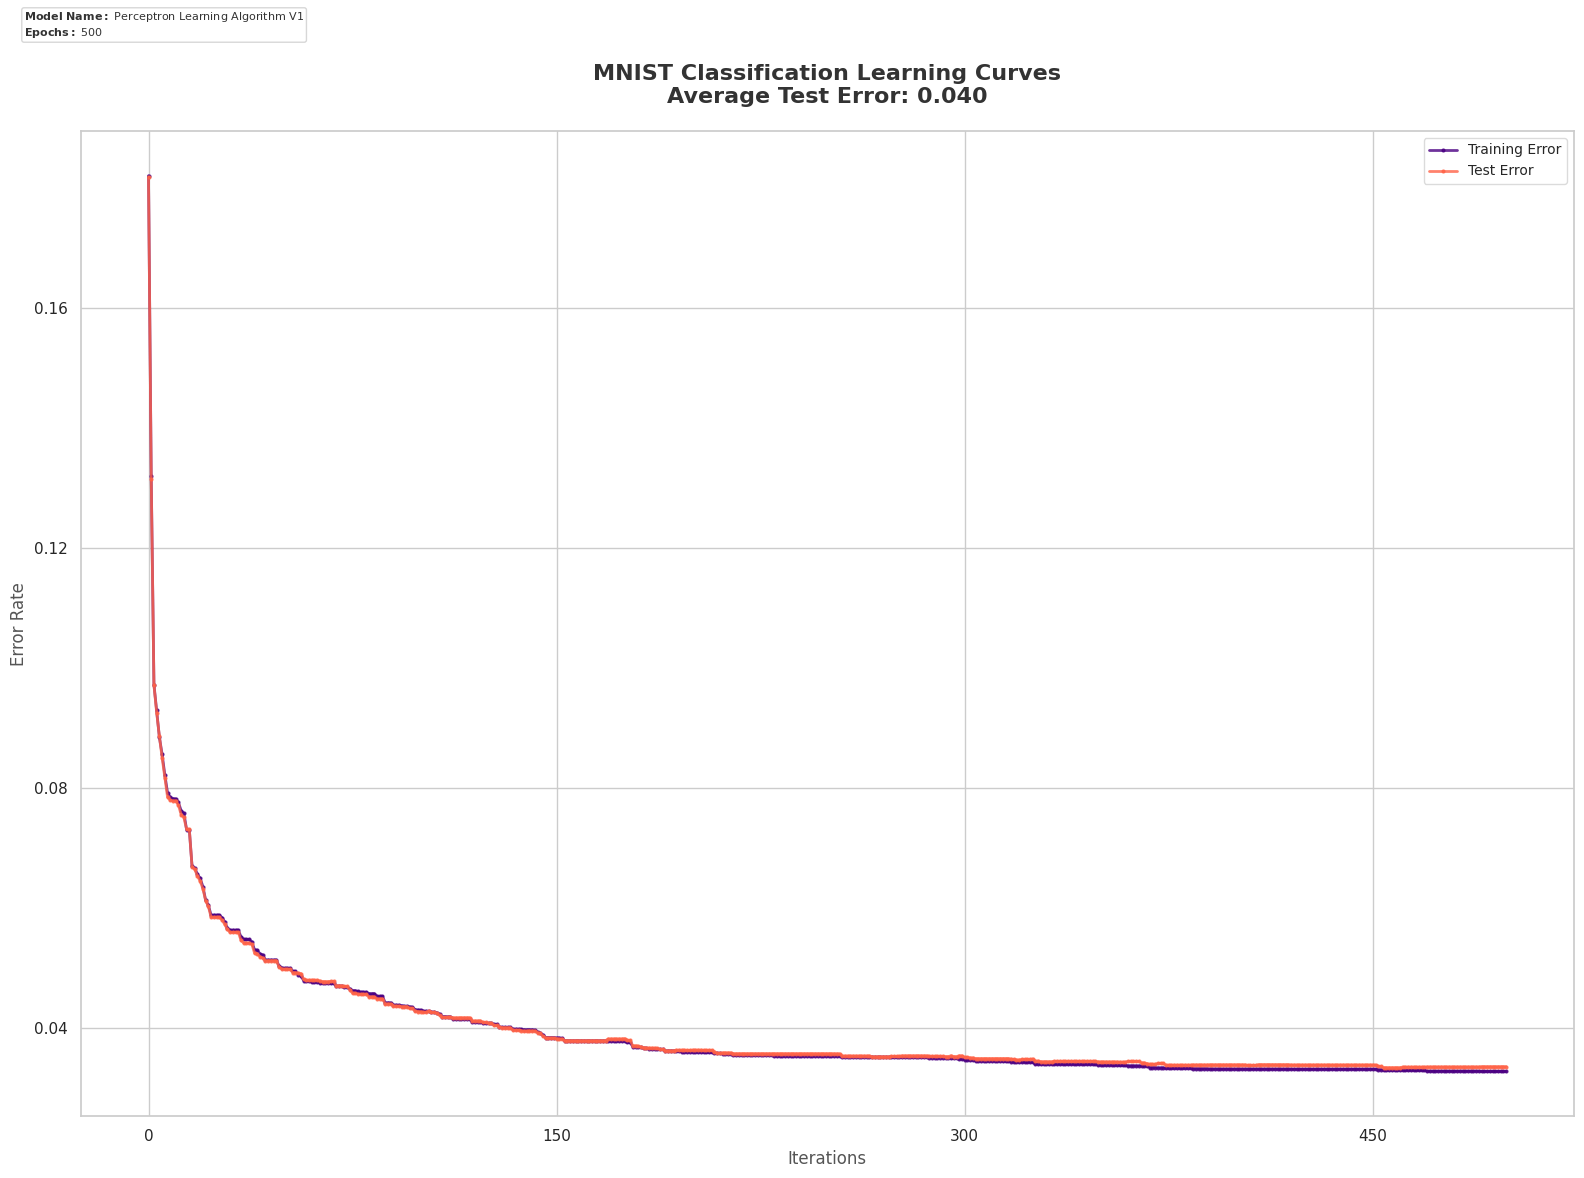

In [ ]:
# Plot learning curves
plot_learning_curves(pla_model, pla_model_details)

When analyzing the graph we can observe that as training progresses, the error rates plateau, with minimal differences observed between training and test errors throughout the epochs. This suggests that the model has learned effectively up to a certain point. However, the minimal reduction in error after a certain number of iterations indicates that the model reaches a saturation point where further learning does not significantly improve performance. This plateau in error reduction may be due to the inherent limitations of the Perceptron Learning Algorithm (PLA), which is a relatively simple and linear model. The close proximity of the training and test error curves is particularly notable, as typically one expects a slight difference, with training error being marginally lower due to the model's direct optimization on the training set.

We can also see that the model’s performance on the test set almost mirrors its performance on the training set, which could reflect the PLA’s inability to capture the complexities of the multi-class dataset. The one-vs-all classification strategy employed by the model may struggle with issues such as class imbalance and the nuanced decision boundaries that are often present in multi-class problems. Moreover, the PLA’s binary decision-making nature, while suitable for simpler tasks, may fail to capture the intricacies and uncertainties inherent in multi-class classification, leading to similar error rates for both training and test sets.

Given these factors, the lack of significant difference between the training and test error curves is likely not indicative of overfitting, but rather a result of the PLA's simplicity and limited capacity to adapt to the complexity of the data. A more flexible and sophisticated model, such as a multi-class perceptron or a model with more advanced decision-making capabilities, might offer a better understanding of the data and potentially improve performance by capturing more complex patterns. Thus, while the observed convergence is a sign of the model reaching its learning limit, the close alignment of the error rates is primarily a reflection of the PLA’s limitations in handling complex, multi-class datasets.

**Confusion Matrix**<br>
We will examine the confusion matrix to gain insights into the classification accuracy and the model's ability to distinguish between different classes.

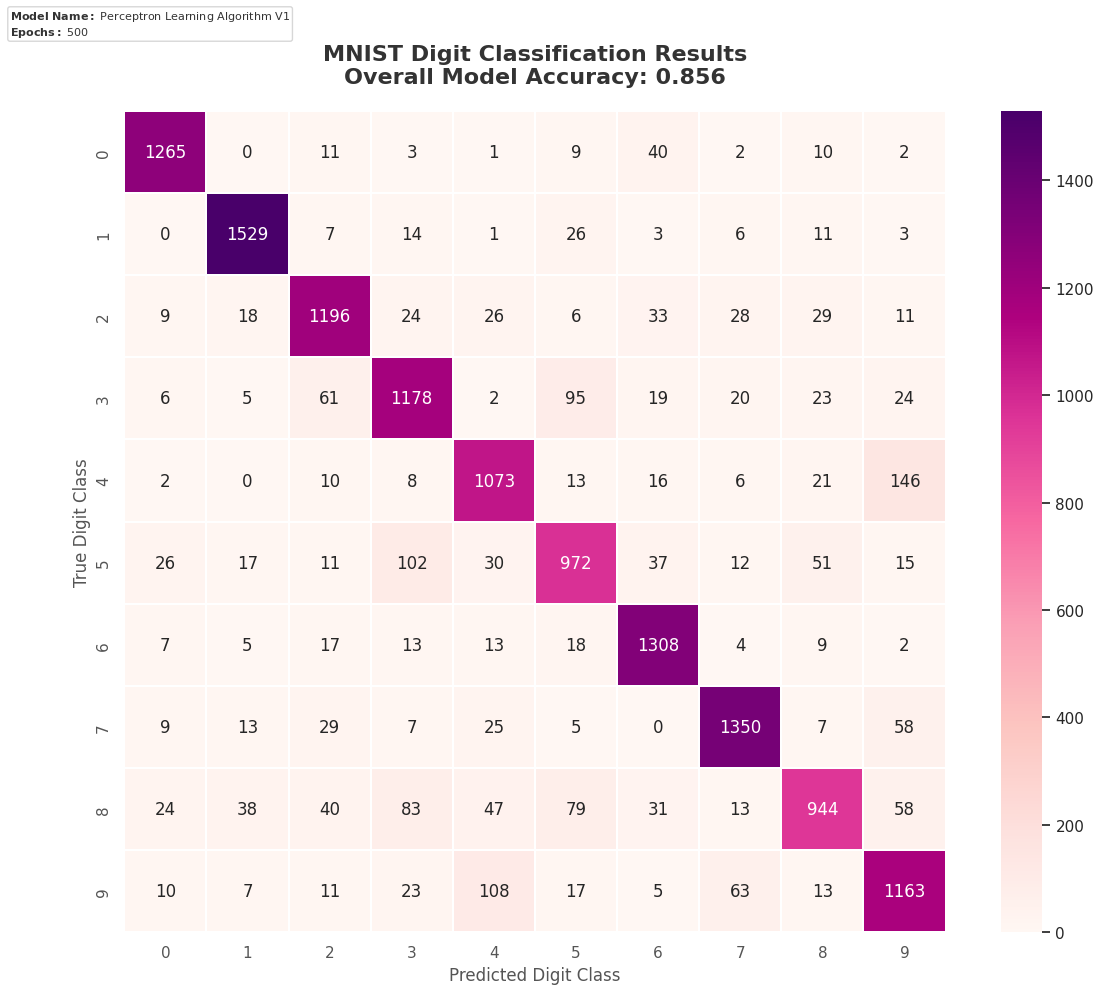

In [ ]:
# Plot the model's confusion matrix
plot_confusion_matrix(y_test_orig, pla_y_pred, pla_model_details)

The confusion matrix reveals interesting patterns about the classifier's performance on the MNIST dataset. As anticipated from a linear classifier lacking the hierarchical feature extraction capabilities of neural networks, the model exhibits notable confusion between visually similar digit pairs. Particularly pronounced misclassifications occur between digits that share structural similarities: there are many of instances where the digit '4' is misclassified as '9', and also cases where '9' is incorrectly labeled as '4', likely due to their similar upper curves and vertical strokes. The model also demonstrates significant confusion between '3' and '5', with many cases of '5' being misclassified as '3' or '8', presumably due to their shared curved segments. Moreover, the perceptron shows weakness in distinguishing '7' from '1', with some cases of '7' being misclassified as '9', reflecting the challenge of discriminating between digits with strong vertical components using only linear decision boundaries.

These patterns of misclassification align with the inherent limitations of the perceptron architecture, which lacks the capacity to learn complex, nonlinear decision boundaries necessary for more nuanced visual feature discrimination.

#### **Model: Multiclass PLA V1 - Results Discussion**

The implementation of the model for the classification task demonstrates both significant strengths and notable limitations. The model achieves an overall accuracy of **83.6%**, with particularly strong performance in recognizing digits 1, 6, and 7. However, the model shows difficulties with digits 5 and 8.

##### **Training and Test Error Trends:**
   - **Training Error:**
     Over the 300 epochs, the training error consistently decreases from 18.26% to 4.17%, reflecting the model’s ability to learn from the data. The relatively steady decrease in training error suggests that the perceptron is effectively minimizing its error on the training set.
   
   - **Test Error:**
     The test error fluctuates but gradually decreases from 37.22% to 5.76% over the epochs. An interesting pattern occurs between epochs 20-100, where the test error is consistently lower than the training error. This is unusual as one would typically expect training error to be lower. Several factors might contribute to this: potential implementation nuances in the one-vs-all strategy, the binary nature of perceptron decisions, or the distribution of complex cases in the datasets. After epoch 150, the error curves converge, suggesting diminishing returns with additional training.

##### **Accuracy by Class:**

**Strong Performers:**<br>
  Digit 0 (Accuracy: 96.35%) and Digit 1 (Accuracy: 96.00%) show exceptional performance. These digits are correctly classified most of the time, with both achieving accuracy above 95%, suggesting that the perceptron model has learned to distinguish them effectively.
  Digit 6 (Accuracy: 94.77%) also performs well, with a high accuracy indicating that the model is proficient at recognizing this digit.

**Moderate Performers:**<br>
  Digit 2 (Accuracy: 83.91%) and Digit 3 (Accuracy: 84.37%) achieve moderate accuracy, which suggests that while the model performs decently with these digits, there is still room for improvement, especially with more complex handwriting styles or varying slants.
  Digit 4 (Accuracy: 85.17%) also performs reasonably well, though it is more prone to misclassifications compared to digits 0, 1, or 6.
  Digit 7 (Accuracy: 86.96%) shows fairly strong performance, but still lags behind the top-performing digits like 0 and 1.

**Weak Performers**<br>
  Digit 5 (Accuracy: 59.39%) and Digit 8 (Accuracy: 66.18%) have significantly lower accuracies, reflecting that the model struggles more with these digits. The difficulty in recognizing digit 5 is further confirmed by its low recall and F1-score, which likely stems from its visual similarities with other digits (such as 3 and 9).
  Digit 9 (Accuracy: 78.38%) also shows lower performance, although it is still recognized with better accuracy than digits 5 and 8. This suggests that the model may have trouble differentiating between digit 9 and other similar digits like 4 or 3.


##### **Precision, Recall, and F1-Score Metrics:**
   - **Precision:**
     The precision values are generally high across most digits, particularly for digits 1, 6, and 7. However, precision for digit 3 is lower, indicating more misclassifications for this digit.
   
   - **Recall:**
     Recall shows more variation. The model struggles most with digit 5, achieving the lowest recall. Recall for digit 0 and 1 is much higher, indicating that the model is very good at identifying these digits. The challenges with digits 5 and 8 may arise due to visual similarities with other digits, such as the resemblance between 5 and 3.
   
   - **F1-Score:**
     The F1-scores are generally strong, with digit 1 achieving the highest score. However, digits like 5 and 3 have relatively lower F1-scores, reflecting the model’s difficulties in accurately distinguishing these digits.

##### **Confusion Matrix Analysis:**
   The confusion matrix highlights specific challenges in distinguishing visually similar digit pairs, such as 4-9 and 5-3. These pairs are difficult for the perceptron to differentiate due to the linear decision boundary limitations inherent in the perceptron model. The one-vs-all approach, while effective, may not capture the complex relationships between similar digits, leading to misclassifications in such cases.

##### **Learning Curves and Convergence:**
   The learning curves show that the model initially converges rapidly, with both training and test errors decreasing steeply between epochs 20-100. After epoch 150, the learning curves flatten, indicating that the model has largely stabilized. This suggests that additional training beyond this point would yield diminishing returns. The test error remaining below the training error early on, followed by the curves converging, highlights some interesting dynamics of the perceptron model, potentially influenced by the one-vs-all strategy or the binary nature of the decision-making process.

##### **Overall Performance:**
   The model’s overall classification accuracy of above 80% is a solid result for a basic perceptron approach. However, it has room for improvement, particularly with digits like 5 and 8, where precision and recall are lower. The challenges in distinguishing visually similar digits (e.g., 4-9, 5-3) are also indicative of the perceptron’s limitations in handling more complex, non-linear decision boundaries.

##### **Conclusion:**
The perceptron with the one-vs-all strategy is a solid starting point for the MNIST digit classification task, achieving a respectable overall accuracy above 80%. It performs well for most digits, particularly 0, 1, and 6, but struggles with certain digits like 5, 8, and 9, which results in lower classification accuracy for these classes. The difficulties in distinguishing visually similar digits, combined with the linear decision boundaries of the perceptron model, highlight the inherent limitations of this approach. While the perceptron provides a useful baseline, more advanced models (such as neural networks with non-linear activation functions) would likely yield better performance, especially for more complex or overlapping digit classes.

## PART B: SoftMax
 In this section, we'll define the Softmax regression model. Softmax regression calculates the probability of each class by using the softmax function. The softmax function converts a vector of values into a probability distribution, where each value is between 0 and 1, and the sum of all values is 1.


The goal is to estimate the probability $P(y = k | x)$ for each class $k \in \{1, \dots, K\}$, where $K=10$ is the total number of classes. The Softmax function ensures that the predicted probabilities for each class sum to 1. The hypothesis of the model can be expressed as:

$$
h(x) = \left( P(y = 1 | x), P(y = 2 | x), \dots, P(y = K | x) \right)
$$

Where the probabilities are computed using the softmax function applied to the weighted input $x$.


 #### **Define the Softmax Regression Model**
In this model, we aim to minimize the softmax cost function, which is a cross-entropy loss function. The model calculates probabilities for each of the possible classes and selects the class with the highest probability. We will implement the gradient descent method to minimize the loss function.


### **Softmax Function and Loss Computation**
1. **Softmax Function**:
   - The softmax function transforms logits into probabilities:  
     $$ h(x) = \frac{e^{w_k^T x}}{\sum_{j=1}^K e^{w_j^T x}} $$  
     where $w_k$ is the weight vector for class $k$, and $x$ is the input.

2. **Loss Calculation**:
   - The model minimizes the cross-entropy loss, defined as:  
     $$ E_{\text{in}}(w) = - \frac{1}{N} \sum_{n=1}^N \sum_{k=1}^K 1\{y_n = k\} \log P(y = k | x_n) $$  
     where $P(y = k | x_n)$ is the predicted probability for class $k$, and $y_n$ is the true label.

3. **Gradient Calculation**:
   - The gradient of the loss with respect to the weights is computed as:  
     $$ \nabla_w E_{\text{in}} = \frac{1}{N} \sum_{n=1}^N (P(y = k | x_n) - 1\{y_n = k\}) x_n^T $$

4. **Prediction**:
   - For a given input $x$, the predicted class is:  
     $$ \hat{y} = \arg\max_k P(y = k | x) $$

The model is trained using mini-batch gradient descent, updating weights iteratively to minimize the loss function.


### **SoftmaxRegression Model Overview**

This class implements a softmax regression model using the MNIST dataset for digit classification. This model is based on the softmax function, which is commonly used for multi-class classification problems, such as digit recognition in this case. The model is trained using stochastic gradient descent (SGD) with mini-batch updates. It includes mechanisms for training, evaluation, and visualization of results, including accuracy, loss, and confusion matrix plots.

### **Model Implementation**

#### Model Structure and Mechanisms

The class defines the following key components:

1. **Initialization**:
   - `learning_rate`: Sets the learning rate for gradient descent.
   - `num_epochs`: Defines how many times the model will iterate over the entire dataset during training.
   - `batch_size`: Specifies the number of samples per batch during training.

2. **Data Loading and Preprocessing**:
   - The `load_mnist` function fetches and preprocesses the MNIST dataset, normalizing the pixel values to the range [0, 1] and adding a bias term. The dataset is split into training and testing sets.

3. **Model Mechanics**:
   - **One-Hot Encoding**: Converts the target labels into a one-hot encoded format.
   - **Softmax Function**: Converts raw model outputs (logits) into probability distributions for each class.
   - **Loss Calculation**: Uses the cross-entropy loss function to quantify the model's performance.
   - **Gradient Calculation**: Computes gradients for weight updates using backpropagation.
   - **Prediction**: The model predicts the class with the highest probability for each input.

4. **Training Process**:
   - The `train` method updates model weights using mini-batch gradient descent.
   - The loss for each epoch is computed, and the model's performance on the test set is evaluated after each epoch.

5. **Evaluation**:
   - **Accuracy**: The model's prediction accuracy is calculated.
   - **Confusion Matrix**: Generates a confusion matrix to assess performance for each class (digit).
   - **Sensitivity**: Calculates the sensitivity (True Positive Rate) for each class.

6. **Visualization**:
   - **Loss Curves**: The `plot_loss` method visualizes the training and test loss over epochs.
   - **Confusion Matrix**: The `plot_confusion_matrix` method displays a heatmap of the confusion matrix.

#### **Code Summary**

The `SoftmaxRegression` class includes:
- `__init__`: Initializes hyperparameters and model parameters.
- `load_mnist`: Loads and preprocesses the MNIST dataset.
- `one_hot_encode`: Converts labels to one-hot encoding.
- `softmax`: Applies the softmax function to logits.
- `compute_loss`: Computes the cross-entropy loss.
- `compute_gradient`: Computes the gradient for backpropagation.
- `predict`: Predicts the class for input data.
- `train`: Trains the model using mini-batch gradient descent.
- `calculate_accuracy`: Computes the accuracy of the model.
- `calculate_confusion_and_sensitivity`: Computes the confusion matrix and sensitivity for each class.
- `plot_confusion_matrix`: Plots the confusion matrix as a heatmap.
- `plot_loss`: Plots the training and test loss curves.
- `run_model`: Executes the full workflow, including training, prediction, evaluation, and visualization.

#### **Reasoning Behind Design Choices**

1. **Softmax for Multi-class Classification**:
   Softmax regression is chosen because it is a natural fit for multi-class classification problems, like digit recognition in MNIST, where each input belongs to one of ten possible classes.

2. **Stochastic Gradient Descent (SGD)**:
   The model uses SGD with mini-batches to balance computational efficiency and convergence speed. This allows the model to process large datasets like MNIST effectively.

3. **Cross-Entropy Loss**:
   Cross-entropy loss is used because it is the standard loss function for classification problems involving probabilities and softmax outputs.

4. **Evaluation with Confusion Matrix and Sensitivity**:
   The confusion matrix and sensitivity are used to evaluate how well the model performs for each class, providing more detailed insights into its strengths and weaknesses.

#### **Approach Summary**

This model follows a straightforward approach to multi-class classification using softmax regression. The training is done through mini-batch gradient descent, and the model is evaluated using a combination of accuracy, confusion matrix, and sensitivity metrics. The use of visualization tools for the loss curves and confusion matrix enhances the interpretability and understanding of the model’s performance.

**Note:**<br>
The `load_mnist` function is provided for convenience, but the data remains identical to that mentioned previously.

In [ ]:
"""
Algorithm Overview:
-----------------
Softmax regression extends logistic regression to handle multiple classes by using the softmax function
to convert raw model outputs into probability distributions over the classes.

Key Components:
1. Softmax Function: σ(z)_i = exp(z_i) / Σ_j exp(z_j)
   - Converts raw scores into probabilities that sum to 1
   - Numerically stabilized by subtracting max value before exponential

2. Cross-Entropy Loss: -Σ y_i log(p_i)
   - Measures difference between predicted probabilities and true labels
   - Using one-hot encoded ground truth labels

3. Gradient Descent:
   - Computes gradient of loss with respect to weights
   - Updates weights iteratively: w = w - η∇L
   - Uses mini-batches for better computational efficiency
"""
class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, num_epochs=50, batch_size=128):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = None

    def load_mnist(self):
        """
        Loads and preprocesses the MNIST dataset.

        Returns:
        --------
        tuple: (X_train, X_test, y_train, y_test)
            - X_train, X_test: Features with added bias term and normalized pixels
            - y_train, y_test: Integer labels for digits
        """
        mnist = fetch_openml('mnist_784', version=1)
        X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype(int)
        X = X / 255.0
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
        return X_train, X_test, y_train, y_test

    @staticmethod
    def one_hot_encode(y, num_classes=10):
        return np.eye(num_classes)[y]

    @staticmethod
    def softmax(z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def compute_loss(self, X, y_encoded):
        z = np.dot(X, self.weights.T)
        probs = self.softmax(z)
        return -np.mean(np.sum(y_encoded * np.log(probs + 1e-10), axis=1))

    def compute_gradient(self, X, y_encoded):
        z = np.dot(X, self.weights.T)
        probs = self.softmax(z)
        grad = np.dot(X.T, (probs - y_encoded)).T / X.shape[0]
        return grad

    def predict(self, X):
        z = np.dot(X, self.weights.T)
        probs = self.softmax(z)
        return np.argmax(probs, axis=1)

    @staticmethod
    def calculate_accuracy(y_true, y_pred):
        return np.mean(y_true == y_pred)

    def train(self, X_train, y_train, X_test, y_test):
        num_features = X_train.shape[1]
        num_classes = 10
        self.weights = np.random.randn(num_classes, num_features) * 0.01

        y_train_encoded = self.one_hot_encode(y_train)
        y_test_encoded = self.one_hot_encode(y_test)

        num_batches = len(X_train) // self.batch_size
        train_losses = []
        test_losses = []

        progress_bar = tqdm(
            range(self.num_epochs),
            desc="Training Progress",
            unit="epoch",
            leave=False,
            position=0,
            bar_format='{l_bar}{bar:10}{r_bar}{bar:-10b}'
        )

        for epoch in progress_bar:
            indices = np.random.permutation(len(X_train))
            X_shuffled = X_train[indices]
            y_shuffled = y_train_encoded[indices]

            epoch_loss = 0
            for batch in range(num_batches):
                start_idx = batch * self.batch_size
                end_idx = start_idx + self.batch_size

                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                grad = self.compute_gradient(X_batch, y_batch)
                self.weights -= self.learning_rate * grad

                batch_loss = self.compute_loss(X_batch, y_batch)
                epoch_loss += batch_loss

            avg_epoch_loss = epoch_loss / num_batches
            train_losses.append(avg_epoch_loss)

            test_loss = self.compute_loss(X_test, y_test_encoded)
            test_losses.append(test_loss)

            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch + 1}, Train Loss: {avg_epoch_loss:.4f}, Test Loss: {test_loss:.4f}")

        return train_losses, test_losses

    def calculate_confusion_and_sensitivity(self, y_true, y_pred):
        """
        Computes the confusion matrix for each digit and sensitivity (TPR) for each class.

        Parameters:
        -----------
        y_true : array-like
            True labels
        y_pred : array-like
            Predicted labels

        Returns:
        --------
        tuple: (confusion_matrix, sensitivities)
            confusion_matrix : numpy.ndarray
                Confusion matrix for the classification results.
            sensitivities : list
                Sensitivity values for each digit (TPR).
        """
        cm = confusion_matrix(y_true, y_pred, num_classes=10)
        sensitivities = []
        for i in range(10):
            tp = cm[i, i]
            fn = np.sum(cm[i, :]) - tp
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
            sensitivities.append(sensitivity)
        return cm, sensitivities

    @staticmethod
    def plot_confusion_matrix(y_true, y_pred, num_classes=10, num_epochs=50, lr=0):
        """
        Plots a confusion matrix to evaluate classification performance.

        Args:
            y_true (numpy.ndarray): True labels of the dataset.
            y_pred (numpy.ndarray): Predicted labels by the model.
            model_details (dict, optional): Details about the model for annotation.
            num_classes (int, optional): Number of classes for confusion matrix.
        """
        model_details = {
            'model_name': 'Softmax Regression',
            'learning_rate': lr,
            'epochs': num_epochs
            }

        sns.set_theme(style="whitegrid")

        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred, num_classes=10)

        # Calculate model accuracy
        accuracy = np.mean(y_true == y_pred)

        # Initialize figure and axis
        fig, ax = plt.subplots(figsize=(12, 10))

        # Create a heatmap for the confusion matrix
        sns.heatmap(cm, cmap='RdPu', square=True, linewidth=0.3, annot=True, fmt='d',
                    annot_kws={'size': 12})

        # Add titles and labels
        plt.title('Classification Results\n' +
                  f'Accuracy: {accuracy:.2%}', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)

        # Display the model details
        if model_details:
            detail_text = (
                r"$\bf{Model:}$" + f" {model_details.get('model_name', 'N/A')}\n" +
                r"$\bf{Learning\ Rate:}$" + f" {model_details.get('learning_rate', 'N/A')}\n" +
                r"$\bf{Epochs:}$" + f" {model_details.get('epochs', 'N/A')}"
            )
            fig.text(
                0.02, 0.98, detail_text,
                ha='left', va='top', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='lightgray',
                          boxstyle='round,pad=0.3', alpha=0.9)
            )

        # Enhance visual appearance
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # Show the plot
        plt.show()

    @staticmethod
    def calculate_sensitivity(y_true, y_pred):
        """
        Calculates sensitivity (TPR) for each class.

        Parameters:
        -----------
        y_true : array-like
            True labels
        y_pred : array-like
            Predicted labels

        Returns:
        --------
        list: Sensitivity values for each digit
        """
        cm = confusion_matrix(y_true, y_pred, num_classes=10)
        sensitivities = []
        for i in range(10):
            tp = cm[i, i]
            fn = np.sum(cm[i, :]) - tp
            sensitivity = tp / (tp + fn)
            sensitivities.append(sensitivity)
        return sensitivities


    def plot_loss(self, train_losses, test_losses, model_details=None, num_epochs=50, lr=0):
        """
        Visualizes the training and test loss over epochs with a customized style.

        Args:
            train_losses: List of training loss values.
            test_losses: List of test loss values.
            model_details (dict, optional): Additional details about the model, such as
                                            name and number of epochs, for annotation.
        """
        model_details = {
            'model_name': 'Softmax Regression',
            'learning_rate': lr,
            'epochs': num_epochs
            }
        # Set a custom color palette and grid-based visual theme
        color_palette = {
            'train': '#4B0082',  # Indigo for training loss
            'test': '#FF6347'    # Tomato for test loss
        }
        sns.set_theme(style="whitegrid")  # Apply a white grid theme for improved readability

        # Initialize the figure and axis with dimensions
        fig, ax = plt.subplots(figsize=(16, 12))

        # Generate the epochs range
        epochs = range(1, len(train_losses) + 1)

        # Plot training and test loss curves
        ax.plot(epochs, train_losses, label='Training Loss',
                linewidth=2, marker='.', markersize=4, color=color_palette['train'], alpha=0.8)
        ax.plot(epochs, test_losses, label='Test Loss',
                linewidth=2, marker='.', markersize=4, color=color_palette['test'], alpha=0.8)

        ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Limit number of x-axis ticks
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Limit number of y-axis ticks

        # Calculate average test loss to include in the title
        avg_test_loss = np.mean(test_losses)

        # Add a descriptive title and labels
        ax.set_title('Training and Test Loss over Epochs\n' +
                    f'Average Test Loss: {avg_test_loss:.3f}',
                    fontsize=16, fontweight='bold', color='#333333', pad=20)
        ax.set_xlabel('Epochs', fontsize=12, color='#555555')
        ax.set_ylabel('Loss', fontsize=12, color='#555555')

        # Add legend
        ax.legend(frameon=True, facecolor='white',
                  edgecolor='lightgray', loc='upper right')

        # Customize the background colors
        ax.set_facecolor('white')
        fig.patch.set_facecolor('white')

        # Display the model details
        if model_details:
            detail_text = (
                r"$\bf{Model\ Name:}$" + f" {model_details.get('model_name', 'N/A')}\n"
                r"$\bf{Learning\ Rate:}$" + f" {model_details.get('learning_rate', 'N/A')}\n" +
                r"$\bf{Epochs:}$" + f" {model_details.get('epochs', len(epochs))}"
            )
            fig.text(
                0.02, 0.98, detail_text,
                ha='left', va='top', fontsize=10,
                color='#333333',
                bbox=dict(facecolor='white', edgecolor='lightgray',
                          boxstyle='round,pad=0.4', alpha=0.9),
                usetex=False
            )

        # Adjust layout to prevent overlap and display the plot
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    def run_model(self):
        X_train, X_test, y_train, y_test = self.load_mnist()
        train_losses, test_losses = self.train(X_train, y_train, X_test, y_test)

        y_pred = self.predict(X_test)
        test_accuracy = self.calculate_accuracy(y_test, y_pred)
        print(f"\nTest Accuracy: {test_accuracy:.4f}")
        conf_matrix, sensitivities = model.calculate_confusion_and_sensitivity(y_test, y_pred)

        self.plot_loss(train_losses, test_losses, num_epochs=self.num_epochs, lr=self.learning_rate)
        self.plot_confusion_matrix(y_test, y_pred, num_epochs=self.num_epochs)

        # sensitivities = self.calculate_sensitivity(y_test, y_pred)
        # for digit, sens in enumerate(sensitivities):
        #     print(f"Sensitivity for digit {digit}: {sens:.4f}")

        cm, sensitivities = self.calculate_confusion_and_sensitivity(y_test, y_pred)
        print("\nConfusion Matrix:")
        # print(cm) # print confusion matrix without a plot
        print("\nSensitivities (TPR) for each digit:")
        for digit, sens in enumerate(sensitivities):
            print(f"Digit {digit}: {sens:.4f}")

Training Progress:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 5, Train Loss: 1.1636, Test Loss: 1.1120
Epoch 10, Train Loss: 0.8368, Test Loss: 0.8201
Epoch 15, Train Loss: 0.7019, Test Loss: 0.6947
Epoch 20, Train Loss: 0.6270, Test Loss: 0.6236
Epoch 25, Train Loss: 0.5781, Test Loss: 0.5770
Epoch 30, Train Loss: 0.5440, Test Loss: 0.5437
Epoch 35, Train Loss: 0.5179, Test Loss: 0.5186
Epoch 40, Train Loss: 0.4976, Test Loss: 0.4988
Epoch 45, Train Loss: 0.4810, Test Loss: 0.4826
Epoch 50, Train Loss: 0.4671, Test Loss: 0.4691
Epoch 55, Train Loss: 0.4554, Test Loss: 0.4577
Epoch 60, Train Loss: 0.4455, Test Loss: 0.4479
Epoch 65, Train Loss: 0.4364, Test Loss: 0.4393
Epoch 70, Train Loss: 0.4288, Test Loss: 0.4317
Epoch 75, Train Loss: 0.4218, Test Loss: 0.4249
Epoch 80, Train Loss: 0.4155, Test Loss: 0.4188
Epoch 85, Train Loss: 0.4100, Test Loss: 0.4133
Epoch 90, Train Loss: 0.4047, Test Loss: 0.4083
Epoch 95, Train Loss: 0.4001, Test Loss: 0.4037
Epoch 100, Train Loss: 0.3958, Test Loss: 0.3995

Test Accuracy: 0.8928


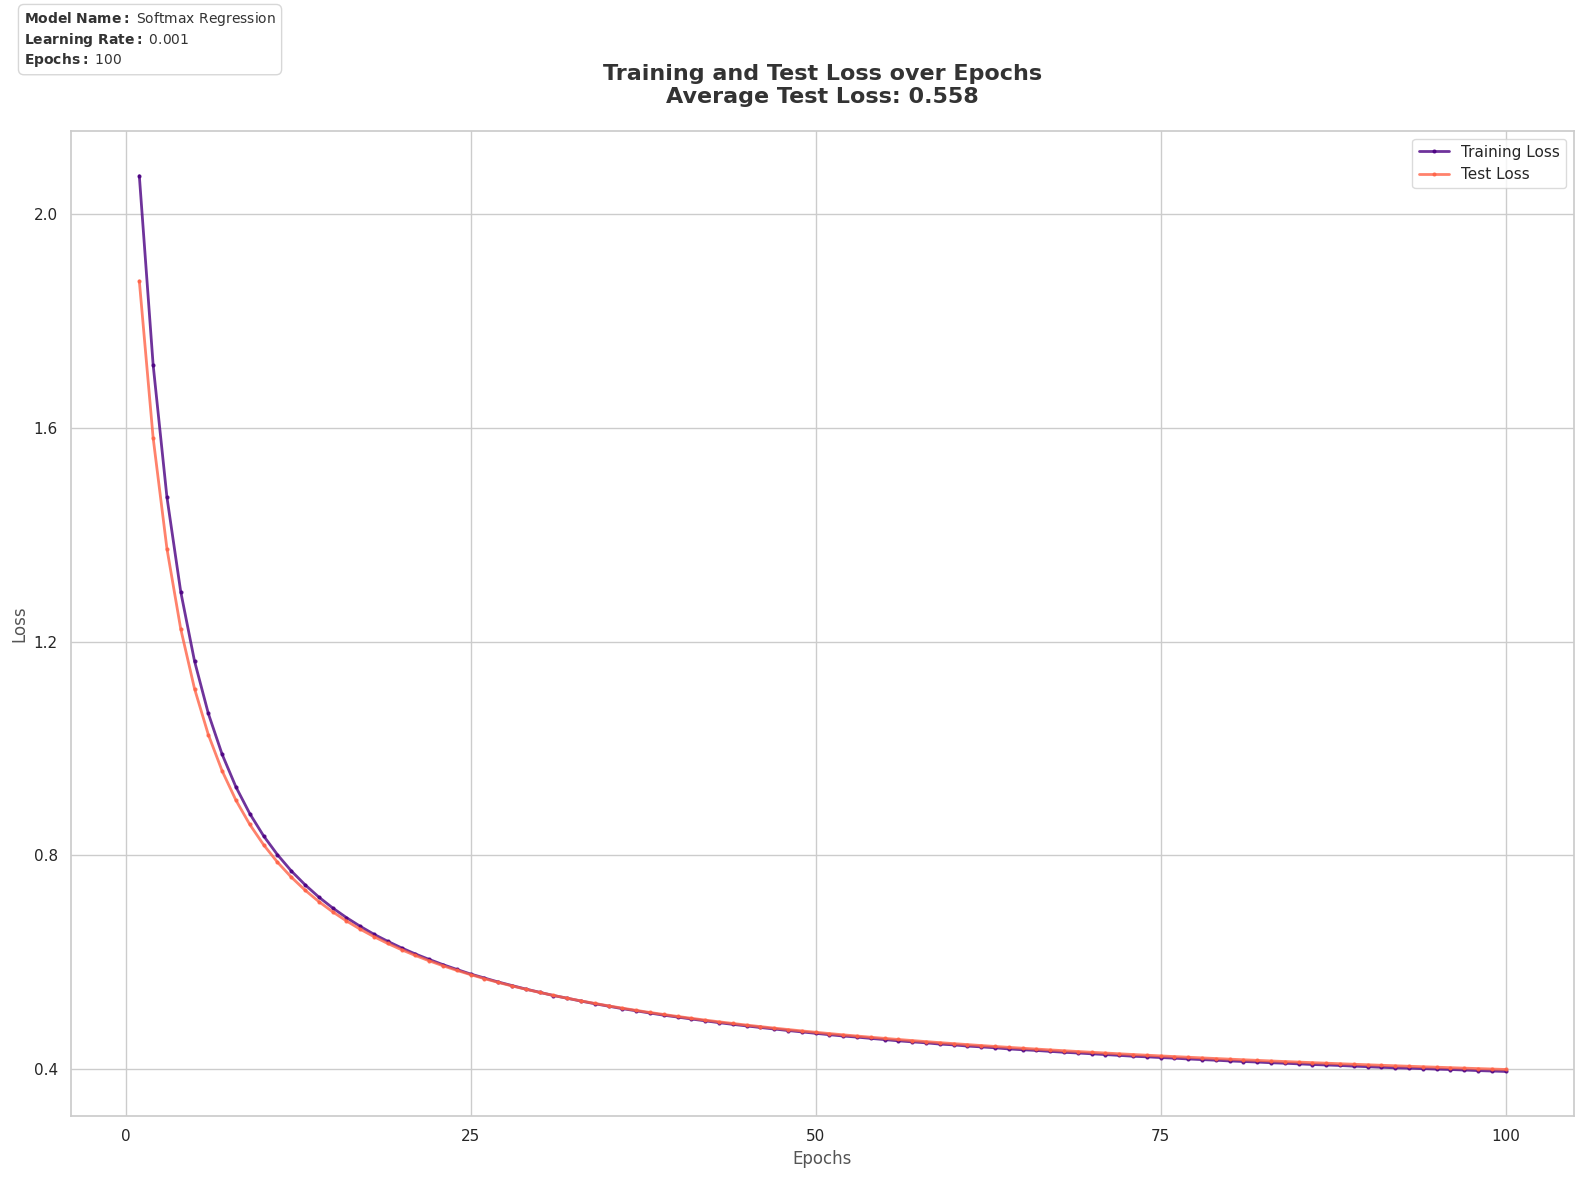

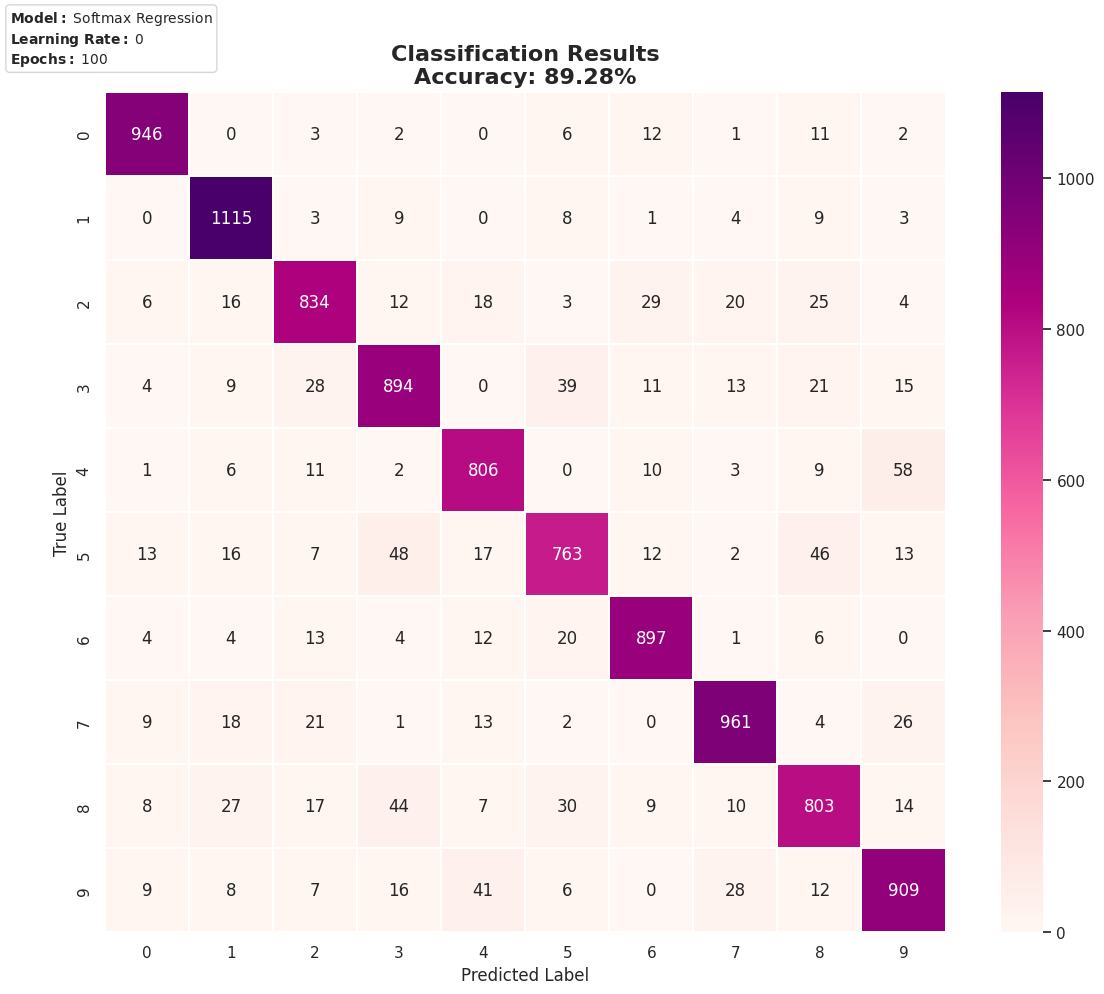


Confusion Matrix:

Sensitivities (TPR) for each digit:
Digit 0: 0.9624
Digit 1: 0.9679
Digit 2: 0.8625
Digit 3: 0.8646
Digit 4: 0.8896
Digit 5: 0.8143
Digit 6: 0.9334
Digit 7: 0.9109
Digit 8: 0.8287
Digit 9: 0.8774


In [ ]:
# Run model to observe initial performance; further analysis will follow later
model = SoftmaxRegression(learning_rate=0.001, num_epochs=100)
model.run_model()


We want to evaluate a broader range of hyperparameters by selecting configurations with more epochs, allowing us to see how the model performs over extended training periods. For instance, in some of the configurations, we'll increase the number of epochs to 100. By doing so, we can observe how the model improves over time, and more importantly, we can see if good results are already achievable in the early stages of training. This is useful because it helps us determine if the model is converging too slowly or too quickly, and whether further training beyond a certain point is necessary.

Additionally, we want to explore a wide range of learning rates, from 0.01 to 0.2. The reason for this is that the learning rate significantly influences how quickly the model converges. A higher learning rate may cause the model to converge faster, but it can also make the training unstable, potentially leading to overshooting the optimal solution. On the other hand, a lower learning rate will result in slower convergence, allowing the model to make smaller, more stable adjustments. By testing a wide range of learning rates, we aim to strike a balance between training time and accuracy, and ensure we don't miss the optimal learning rate that provides the best results for this task.

By running experiments with more epochs and a variety of learning rates, we can better understand how the model performs both in the early stages and as it continues to train. This also allows us to pinpoint the most effective learning rate for stable and efficient training, while ensuring that the model converges at the optimal point within the training process.

We evaluate and compare the performance of several models using different hyperparameter configurations. Specifically, we will vary the learning rate, number of epochs, and batch size across four different setups. For each configuration, the model will be trained on the MNIST dataset, and we will calculate key performance metrics such as training and test losses, accuracy, and class-wise sensitivities. Sensitivity, or True Positive Rate (TPR), helps us understand how well the model identifies each digit class. After training, we will visualize the results, including loss curves, confusion matrices, and sensitivities. Finally, we will compare the models based on their overall accuracy, average training and test losses, and sensitivities to determine the optimal hyperparameter configuration for the task.

#### **Configuration 1:**
- **Learning Rate:** 0.1  
- **Epochs:** 100  
- **Batch Size:** 128  

In this configuration, we aim to balance speed and stability. A learning rate of 0.1 is moderate, which means the model can make relatively large updates to weights, facilitating faster convergence while reducing the risk of overshooting the optimal solution. The 100 epochs provide ample time for the model to improve and refine its parameters. By using this configuration, we can observe the model’s performance at different stages of training, ensuring that good results are visible early on. The batch size of 128 is a typical choice, balancing computational efficiency and model performance, allowing the model to update its weights in manageable steps.

#### **Configuration 2:**
- **Learning Rate:** 0.05  
- **Epochs:** 100  
- **Batch Size:** 64  

This configuration uses a lower learning rate (0.05), which will slow down the rate of convergence. This setup allows for more precise weight updates, preventing the model from making large, unstable steps in parameter space. With 100 epochs, this configuration gives the model enough time to adjust more finely to the data, providing a good balance between training time and model accuracy. The batch size of 64 is smaller than the previous configuration, meaning the model will perform more frequent weight updates. While this increases training time per epoch, it can help avoid potential instability from larger batch sizes and allow for a more detailed exploration of the parameter space.

#### **Configuration 3:**
- **Learning Rate:** 0.01  
- **Epochs:** 100  
- **Batch Size:** 128  

This configuration uses an even smaller learning rate of 0.01, which results in slower but more stable convergence. By taking smaller steps during training, the model can make finer adjustments to weights, which could lead to a better generalization of the model. The number of epochs (100) allows for extended training, ensuring that the model can further refine its weights over a longer period. This configuration is particularly useful for exploring whether a slower learning process leads to better performance. The batch size of 128 strikes a balance between computational efficiency and the frequency of weight updates, making it a good choice for stability during training.

#### **Configuration 4:**
- **Learning Rate:** 0.2  
- **Epochs:** 50  
- **Batch Size:** 256  

In this configuration, we choose a larger learning rate (0.2), which will lead to faster convergence but may also cause instability in the learning process. This configuration tests the model's ability to handle rapid learning and still converge to a good solution. The number of epochs is set to 50, fewer than in other configurations, to compensate for the faster learning rate. Fewer epochs are generally needed when the model learns quickly, as long as the learning rate is set appropriately. The batch size of 256 is relatively large, meaning fewer updates per epoch but more data per update. This setup could potentially speed up the training process, allowing the model to learn from more data at once, but may reduce the precision of each weight update. This configuration is useful for determining if faster convergence can still lead to good results and if larger batch sizes improve training efficiency.

#### **Why These Configurations?**

We chose to explore a wide range of learning rates to understand the model’s sensitivity to different step sizes during training. Learning rates that are too high might cause the model to overshoot the optimal solution, resulting in poorer performance, while learning rates that are too low may lead to slower convergence and potentially longer training times. By examining a range of values—from 0.01 to 0.2—we aim to find the optimal learning rate that balances speed and stability.

Furthermore, the choice of 100 epochs in most configurations ensures that the models have sufficient time to learn and refine their weights. While early-stage performance might already provide insights into the effectiveness of a configuration, having more epochs allows us to observe whether improvements continue beyond the early stages of training. This will help us determine whether additional training time results in diminishing returns or if it allows the model to achieve better performance.

In summary, by testing these four configurations, we can assess the impact of different learning rates, batch sizes, and epoch counts on the model's ability to learn and generalize from the MNIST dataset. This will provide valuable insights into the trade-offs between training speed, model stability, and accuracy, enabling us to identify the most effective hyperparameter settings for the task.


Processing Configurations:   0%|          | 0/4 [00:00<?, ?config/s]


Running Model 1 with config: {'learning_rate': 0.1, 'num_epochs': 100, 'batch_size': 128}


Training Progress:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 5, Train Loss: 0.3029, Test Loss: 0.3159
Epoch 10, Train Loss: 0.2790, Test Loss: 0.2987
Epoch 15, Train Loss: 0.2680, Test Loss: 0.2937
Epoch 20, Train Loss: 0.2618, Test Loss: 0.2894
Epoch 25, Train Loss: 0.2569, Test Loss: 0.2880
Epoch 30, Train Loss: 0.2531, Test Loss: 0.2868
Epoch 35, Train Loss: 0.2507, Test Loss: 0.2864
Epoch 40, Train Loss: 0.2484, Test Loss: 0.2854
Epoch 45, Train Loss: 0.2466, Test Loss: 0.2845
Epoch 50, Train Loss: 0.2447, Test Loss: 0.2857
Epoch 55, Train Loss: 0.2430, Test Loss: 0.2845
Epoch 60, Train Loss: 0.2418, Test Loss: 0.2873
Epoch 65, Train Loss: 0.2404, Test Loss: 0.2841
Epoch 70, Train Loss: 0.2395, Test Loss: 0.2854
Epoch 75, Train Loss: 0.2379, Test Loss: 0.2864
Epoch 80, Train Loss: 0.2375, Test Loss: 0.2838
Epoch 85, Train Loss: 0.2368, Test Loss: 0.2846
Epoch 90, Train Loss: 0.2357, Test Loss: 0.2852
Epoch 95, Train Loss: 0.2353, Test Loss: 0.2847
Epoch 100, Train Loss: 0.2342, Test Loss: 0.2839
Accuracy for Model 1: 0.9220
Sensitiviti

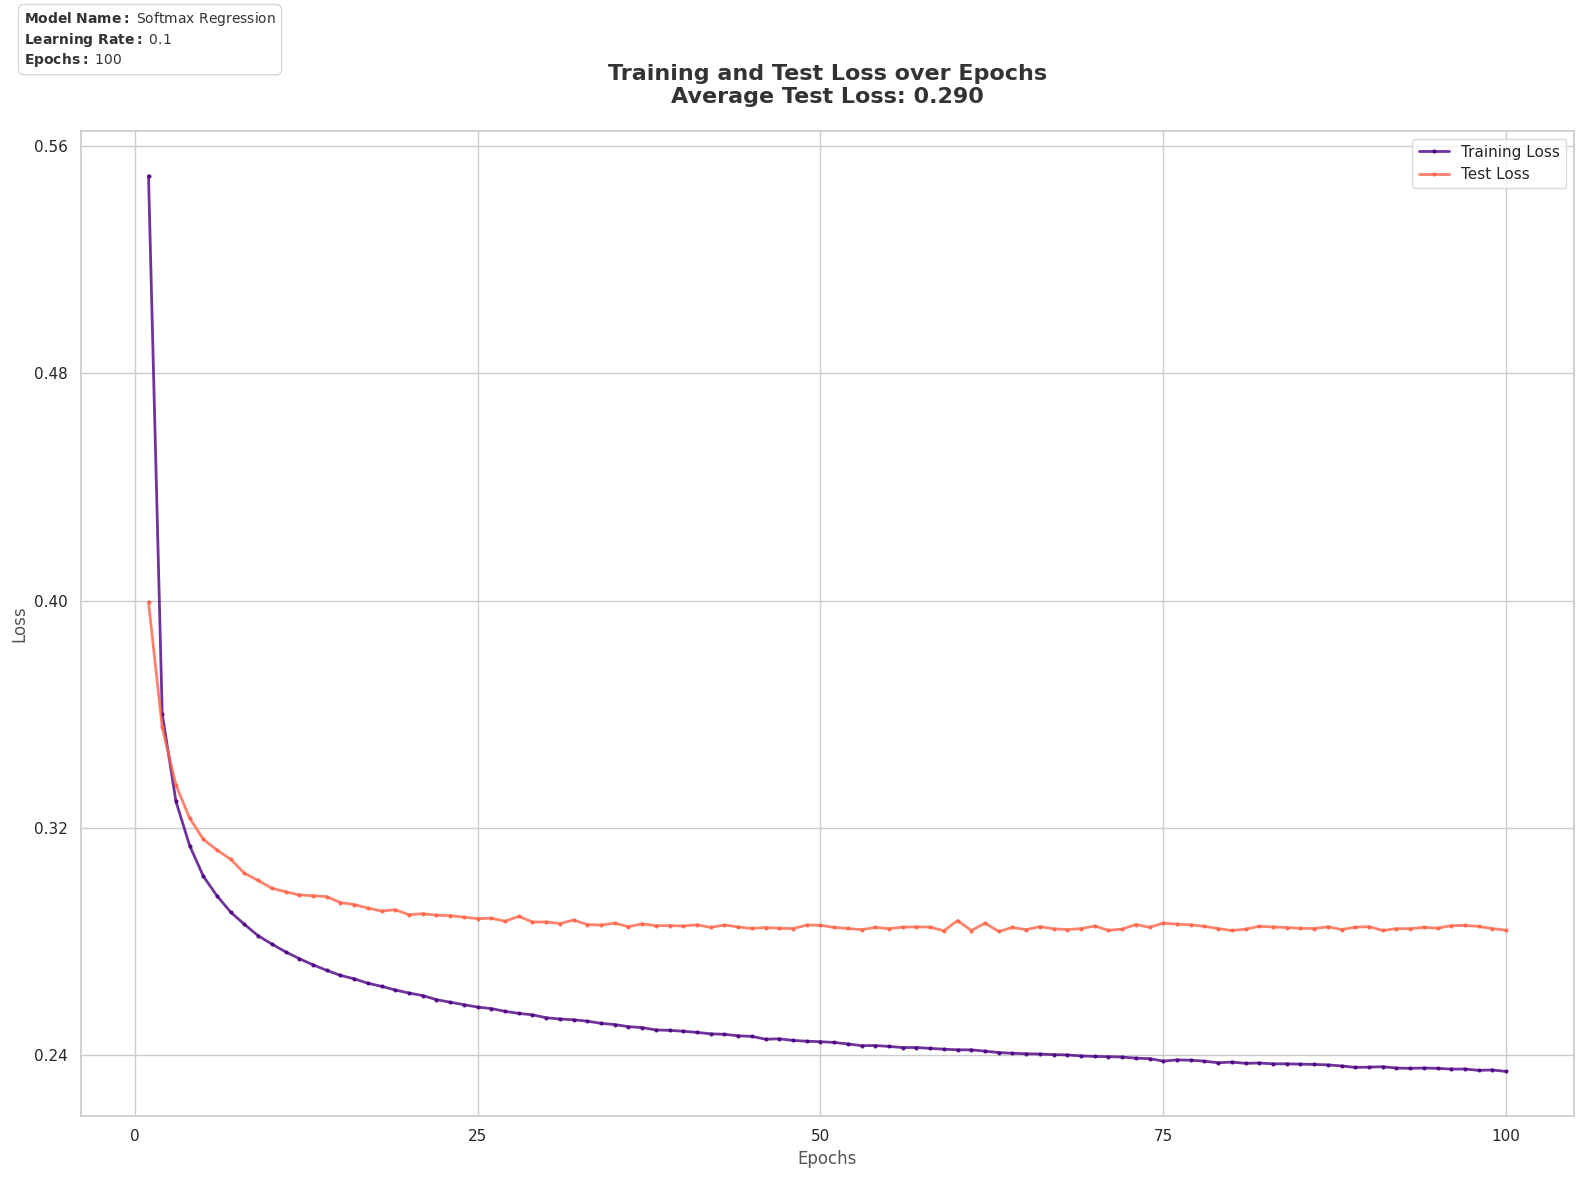

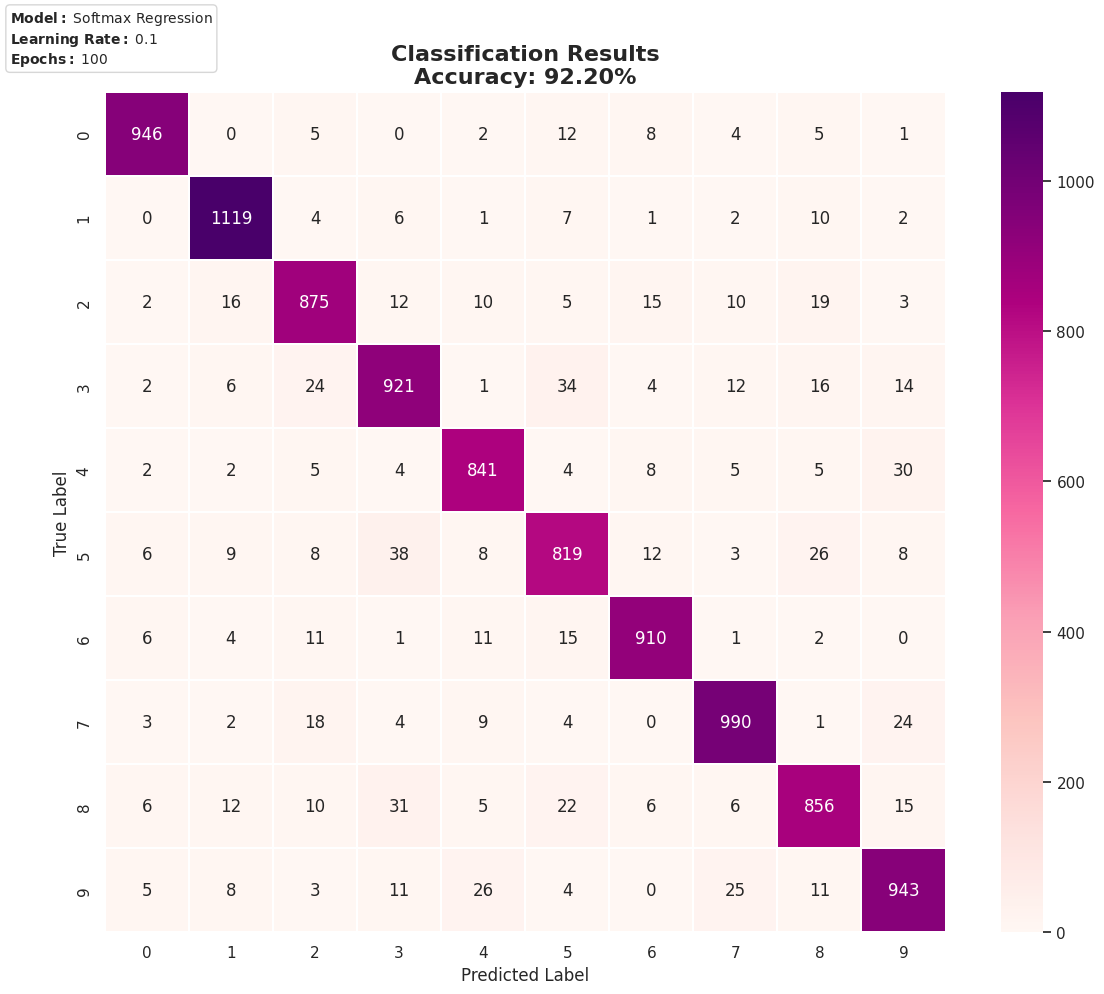


Running Model 2 with config: {'learning_rate': 0.05, 'num_epochs': 100, 'batch_size': 64}


Training Progress:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 5, Train Loss: 0.3032, Test Loss: 0.3166
Epoch 10, Train Loss: 0.2788, Test Loss: 0.2995
Epoch 15, Train Loss: 0.2680, Test Loss: 0.2923
Epoch 20, Train Loss: 0.2614, Test Loss: 0.2896
Epoch 25, Train Loss: 0.2568, Test Loss: 0.2881
Epoch 30, Train Loss: 0.2534, Test Loss: 0.2869
Epoch 35, Train Loss: 0.2506, Test Loss: 0.2860
Epoch 40, Train Loss: 0.2480, Test Loss: 0.2854
Epoch 45, Train Loss: 0.2463, Test Loss: 0.2839
Epoch 50, Train Loss: 0.2442, Test Loss: 0.2852
Epoch 55, Train Loss: 0.2428, Test Loss: 0.2842
Epoch 60, Train Loss: 0.2419, Test Loss: 0.2841
Epoch 65, Train Loss: 0.2404, Test Loss: 0.2844
Epoch 70, Train Loss: 0.2392, Test Loss: 0.2841
Epoch 75, Train Loss: 0.2383, Test Loss: 0.2847
Epoch 80, Train Loss: 0.2374, Test Loss: 0.2841
Epoch 85, Train Loss: 0.2365, Test Loss: 0.2840
Epoch 90, Train Loss: 0.2359, Test Loss: 0.2843
Epoch 95, Train Loss: 0.2351, Test Loss: 0.2857
Epoch 100, Train Loss: 0.2345, Test Loss: 0.2850
Accuracy for Model 2: 0.9208
Sensitiviti

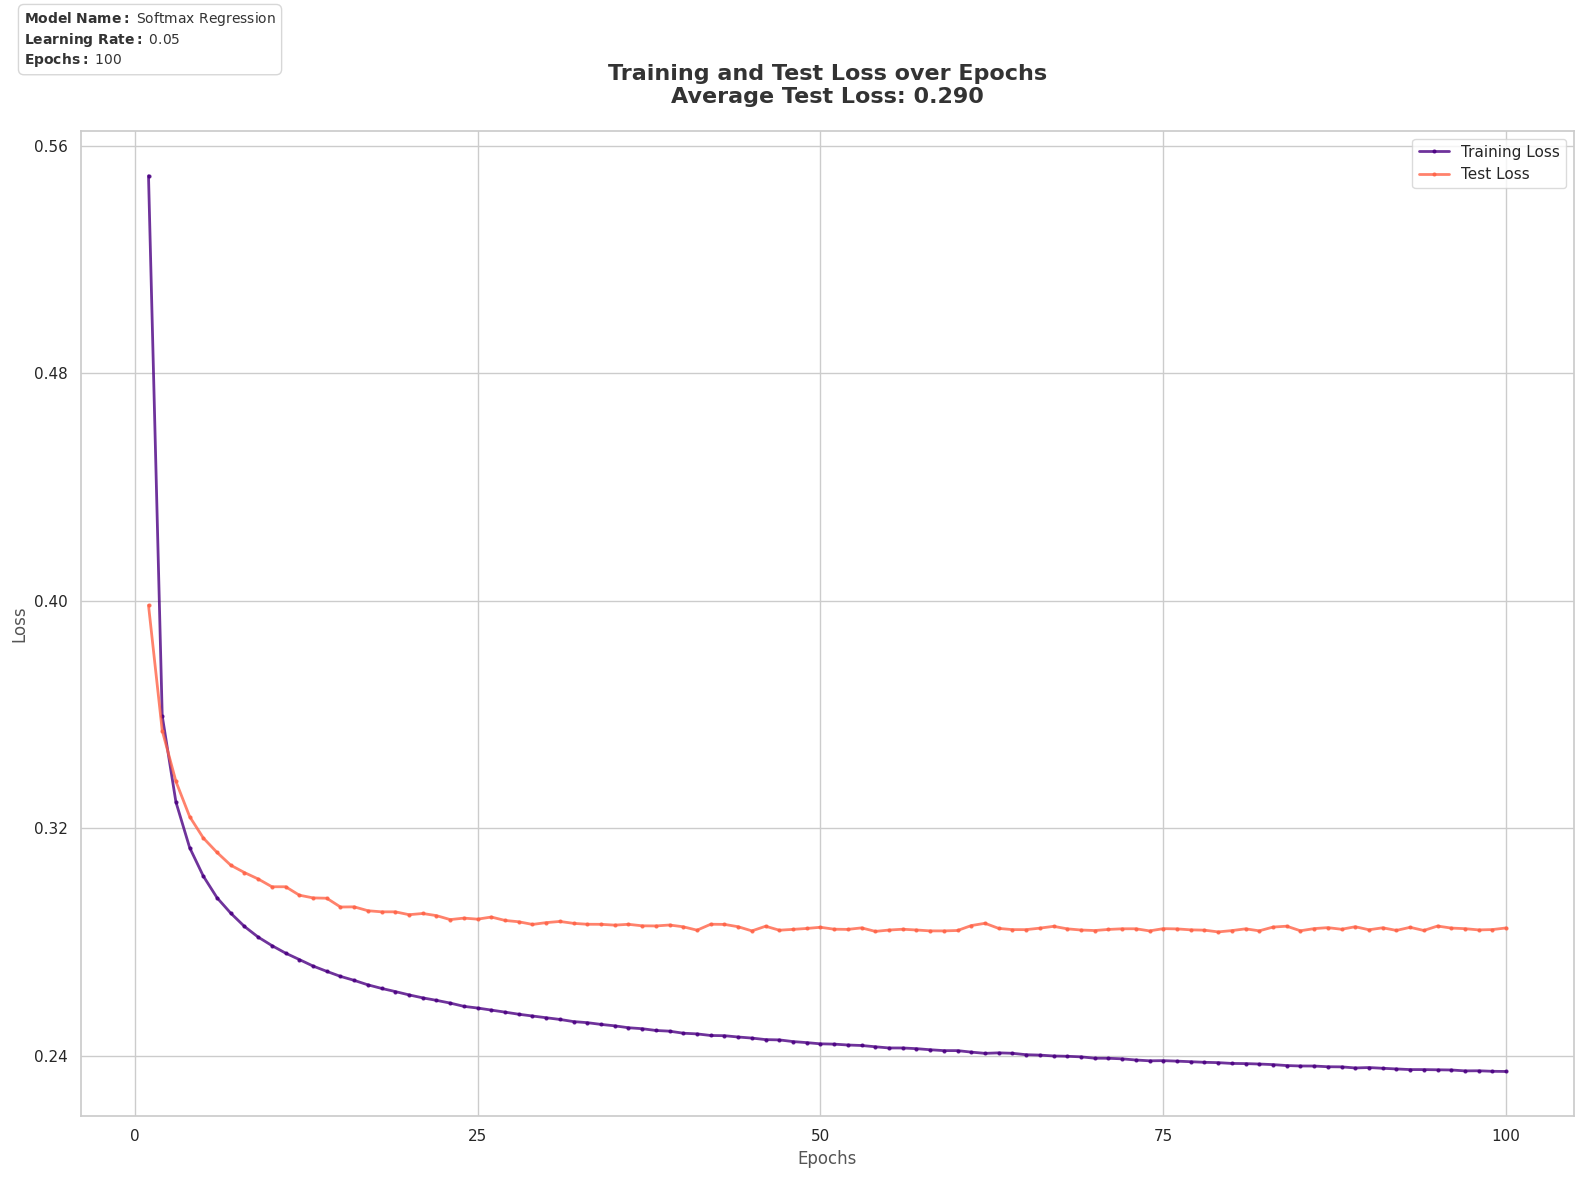

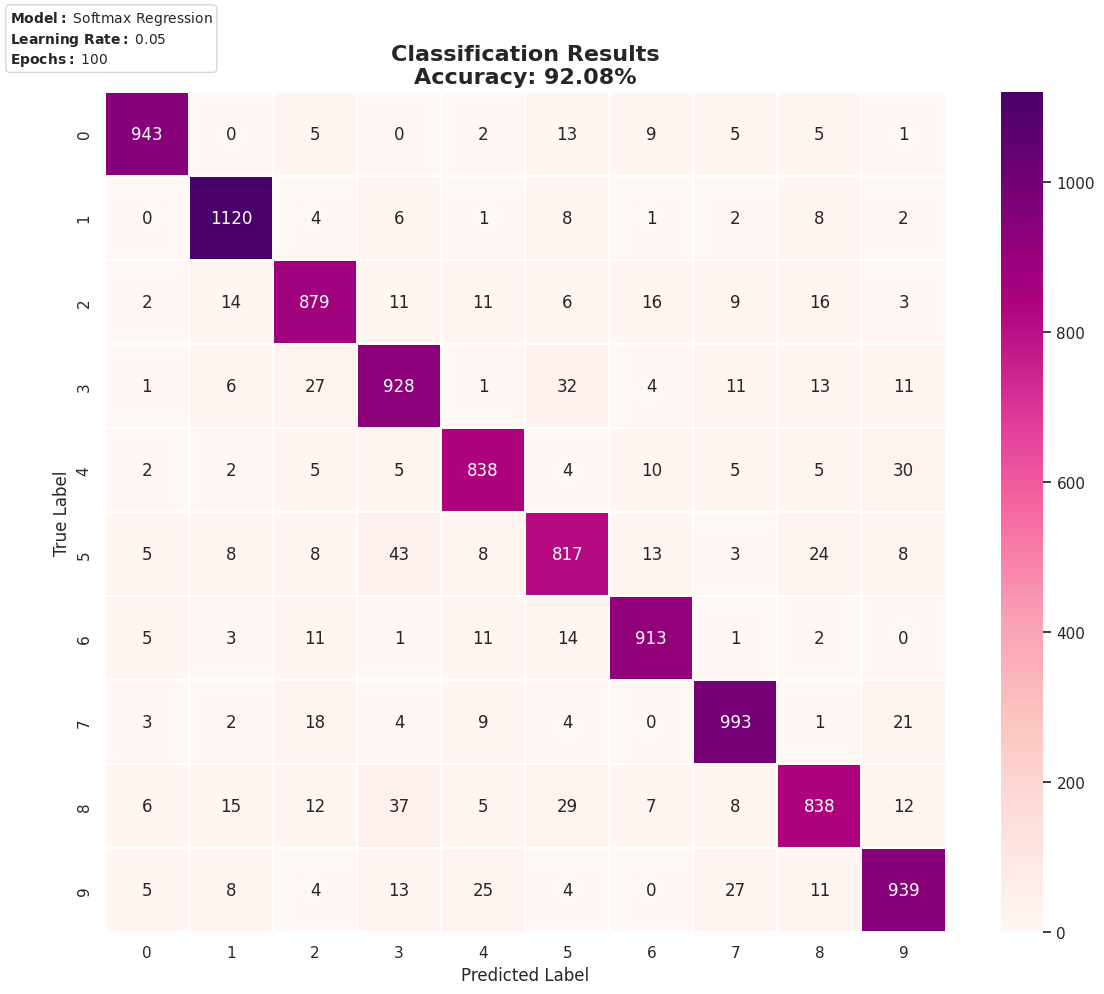


Running Model 3 with config: {'learning_rate': 0.01, 'num_epochs': 100, 'batch_size': 128}


Training Progress:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 5, Train Loss: 0.4789, Test Loss: 0.4696
Epoch 10, Train Loss: 0.3993, Test Loss: 0.3996
Epoch 15, Train Loss: 0.3671, Test Loss: 0.3706
Epoch 20, Train Loss: 0.3485, Test Loss: 0.3541
Epoch 25, Train Loss: 0.3363, Test Loss: 0.3422
Epoch 30, Train Loss: 0.3269, Test Loss: 0.3344
Epoch 35, Train Loss: 0.3198, Test Loss: 0.3279
Epoch 40, Train Loss: 0.3139, Test Loss: 0.3229
Epoch 45, Train Loss: 0.3090, Test Loss: 0.3191
Epoch 50, Train Loss: 0.3052, Test Loss: 0.3157
Epoch 55, Train Loss: 0.3013, Test Loss: 0.3128
Epoch 60, Train Loss: 0.2985, Test Loss: 0.3106
Epoch 65, Train Loss: 0.2958, Test Loss: 0.3083
Epoch 70, Train Loss: 0.2934, Test Loss: 0.3063
Epoch 75, Train Loss: 0.2911, Test Loss: 0.3048
Epoch 80, Train Loss: 0.2893, Test Loss: 0.3033
Epoch 85, Train Loss: 0.2872, Test Loss: 0.3019
Epoch 90, Train Loss: 0.2856, Test Loss: 0.3010
Epoch 95, Train Loss: 0.2842, Test Loss: 0.2995
Epoch 100, Train Loss: 0.2826, Test Loss: 0.2986
Accuracy for Model 3: 0.9176
Sensitiviti

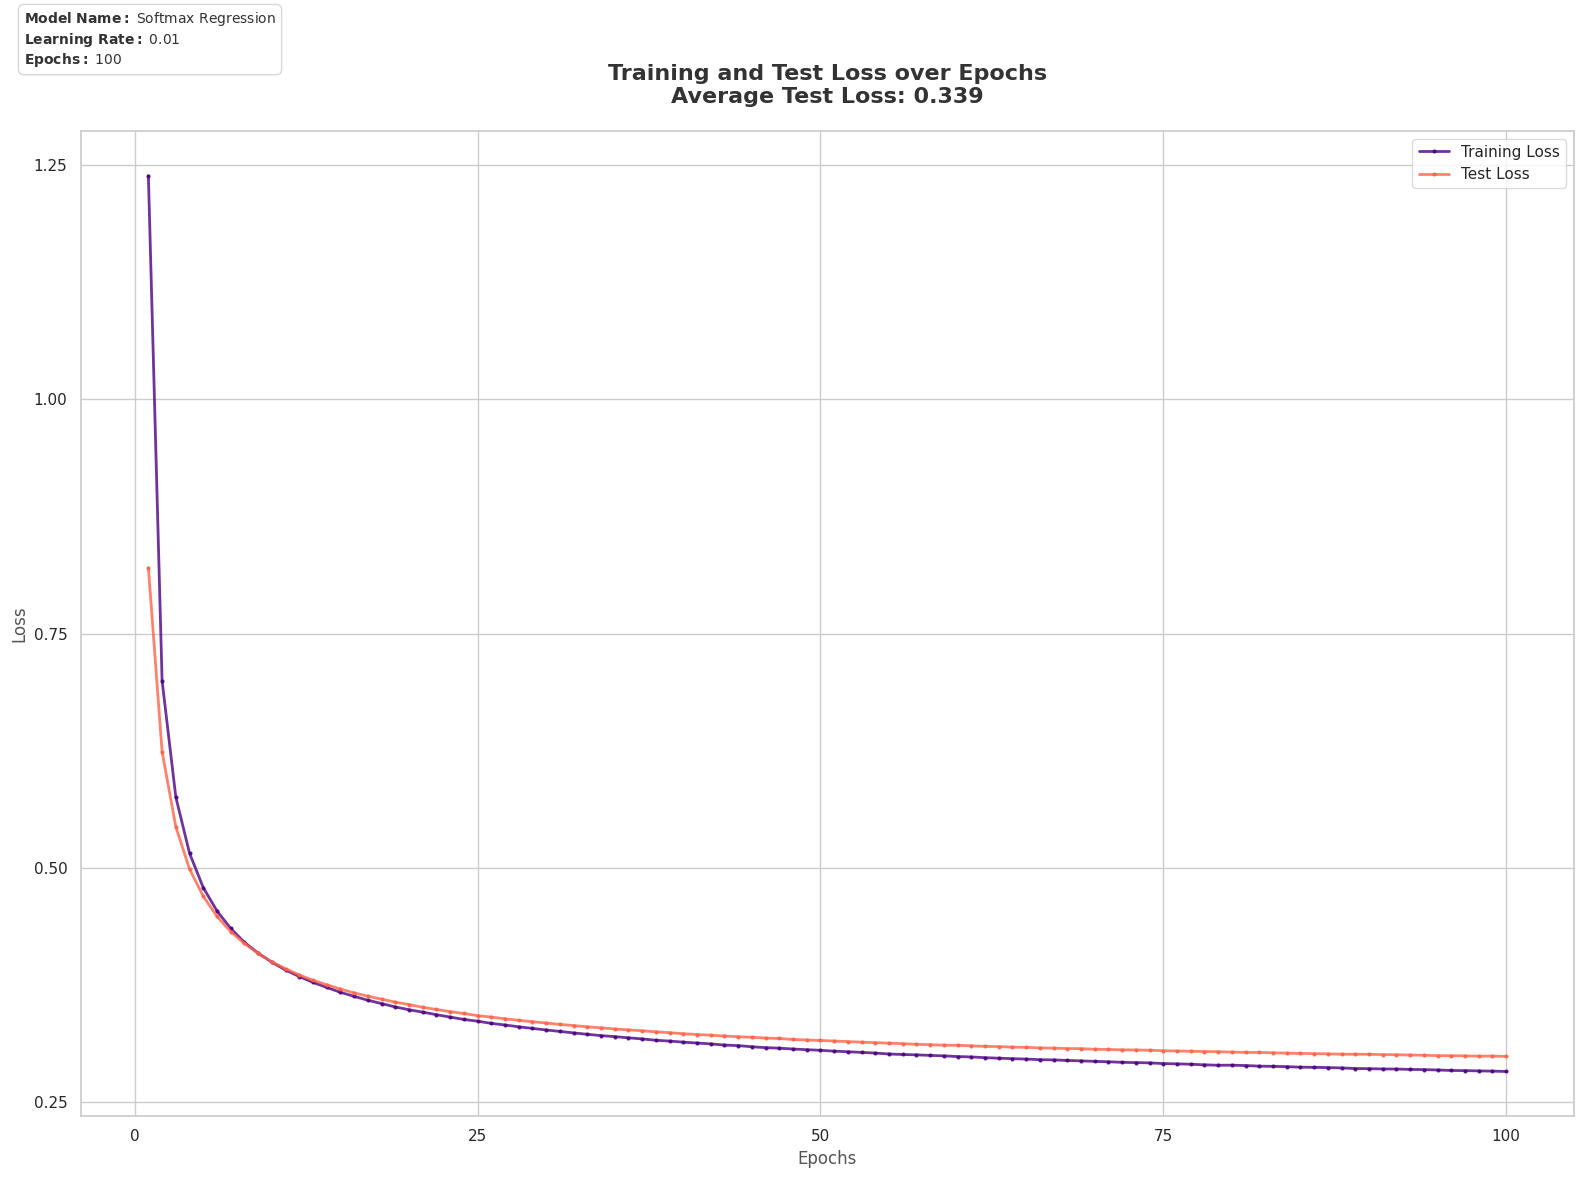

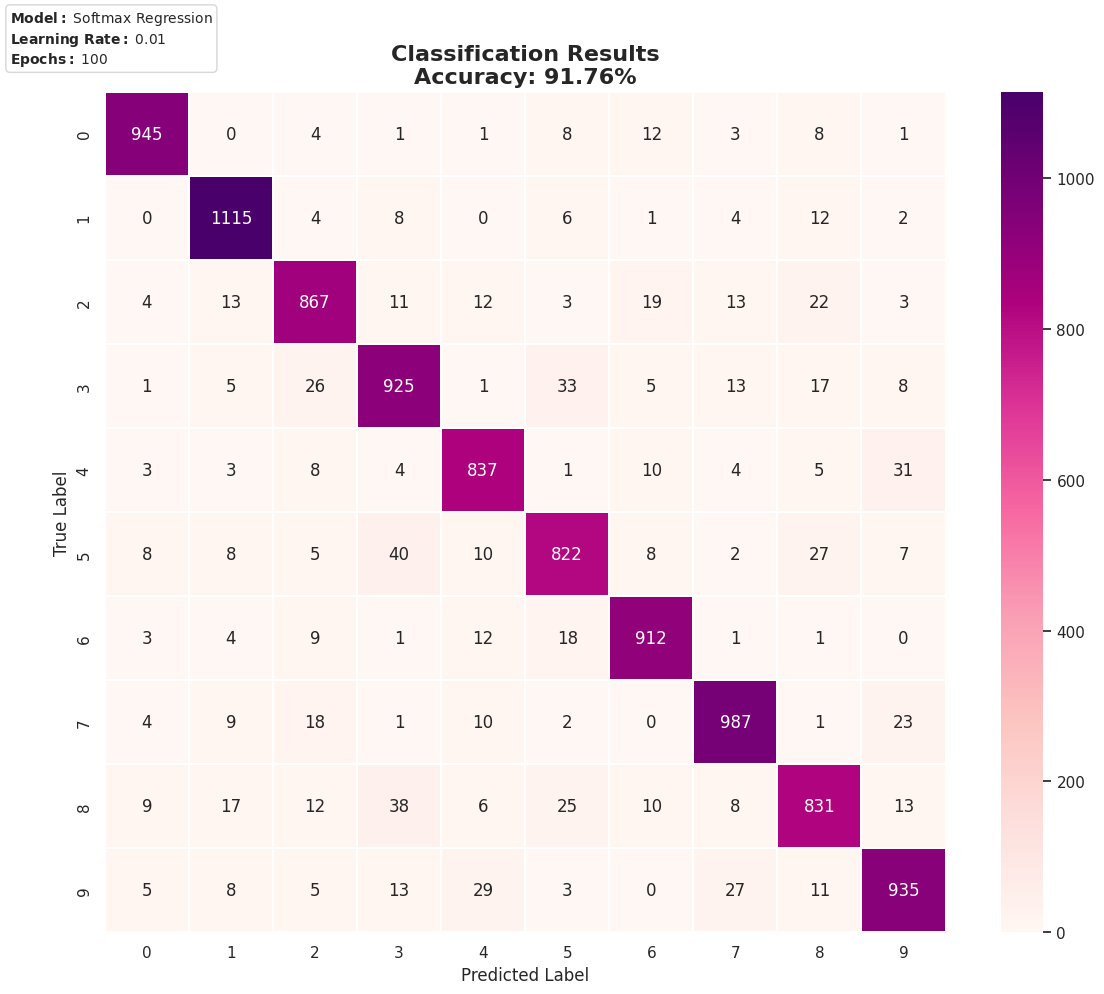


Running Model 4 with config: {'learning_rate': 0.2, 'num_epochs': 50, 'batch_size': 256}


Training Progress:   0%|          | 0/50 [00:00<?, ?epoch/s]

Epoch 5, Train Loss: 0.3035, Test Loss: 0.3170
Epoch 10, Train Loss: 0.2793, Test Loss: 0.2998
Epoch 15, Train Loss: 0.2680, Test Loss: 0.2938
Epoch 20, Train Loss: 0.2617, Test Loss: 0.2899
Epoch 25, Train Loss: 0.2570, Test Loss: 0.2873
Epoch 30, Train Loss: 0.2533, Test Loss: 0.2869
Epoch 35, Train Loss: 0.2506, Test Loss: 0.2865
Epoch 40, Train Loss: 0.2481, Test Loss: 0.2870
Epoch 45, Train Loss: 0.2464, Test Loss: 0.2863
Epoch 50, Train Loss: 0.2446, Test Loss: 0.2849
Accuracy for Model 4: 0.9215
Sensitivities for Model 4: ['0.9583', '0.9731', '0.9049', '0.8868', '0.9249', '0.8783', '0.9584', '0.9403', '0.8710', '0.9093']


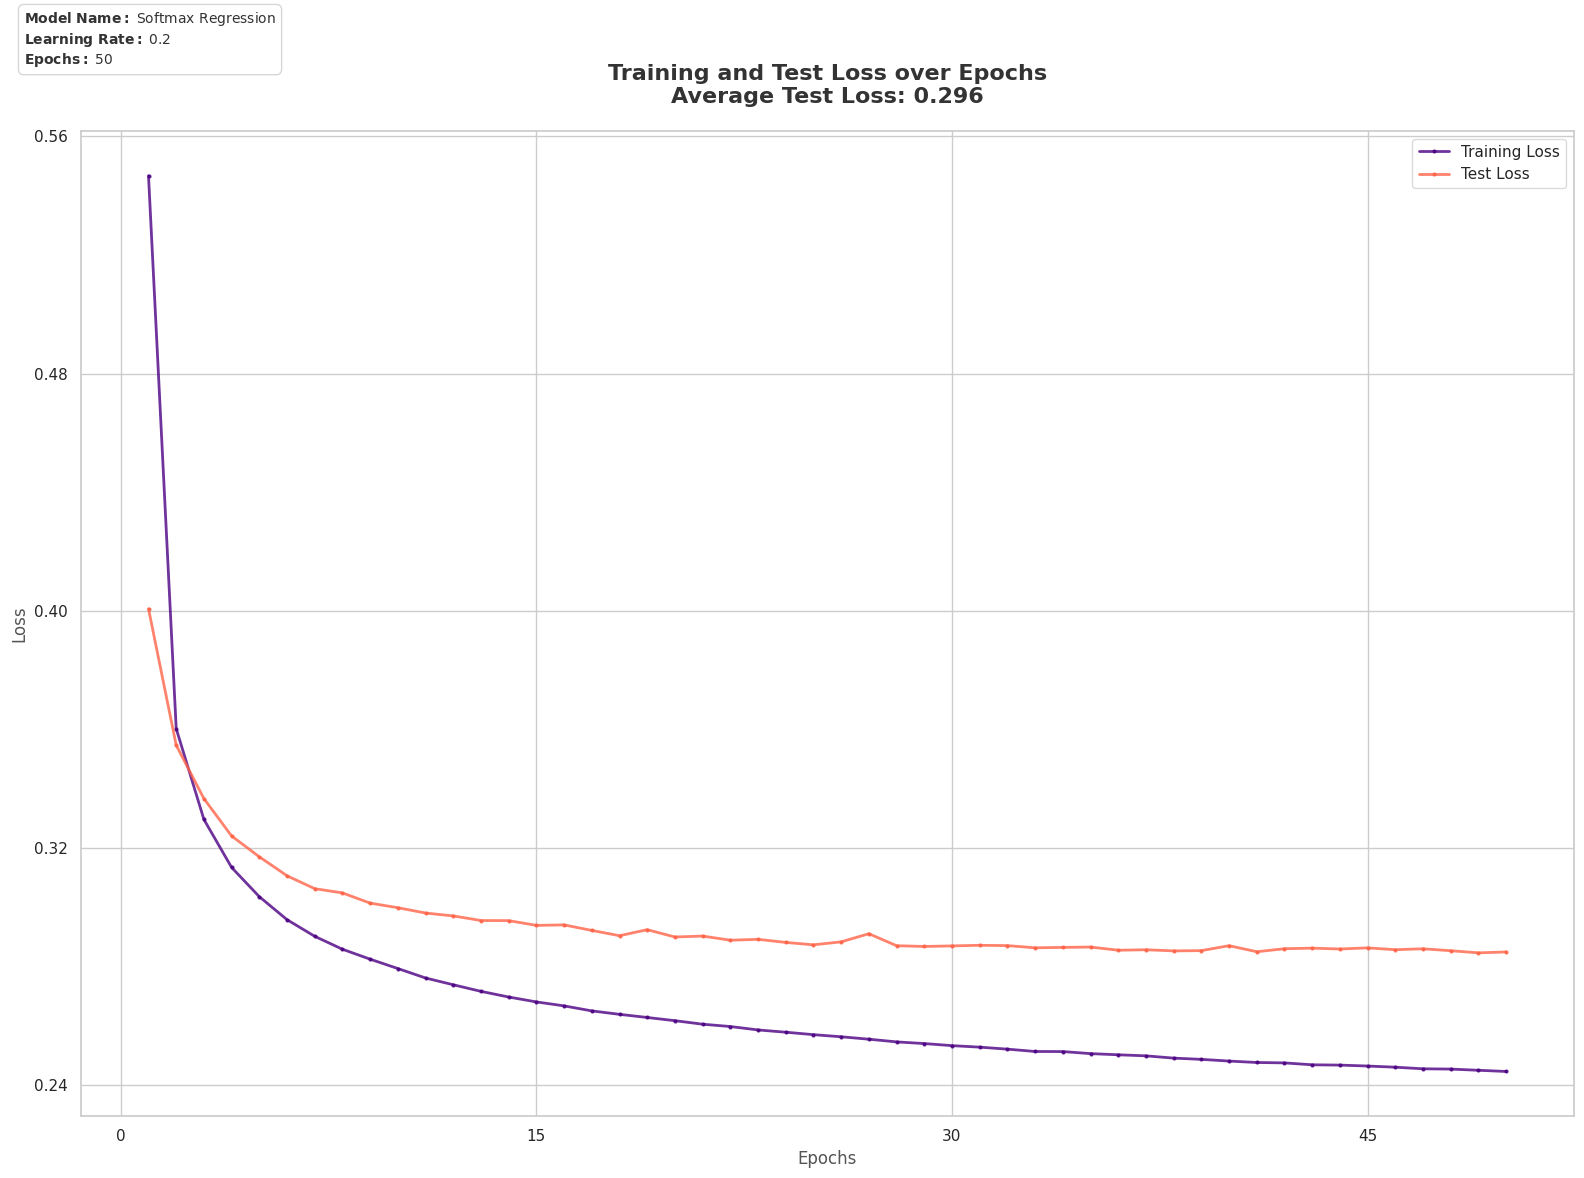

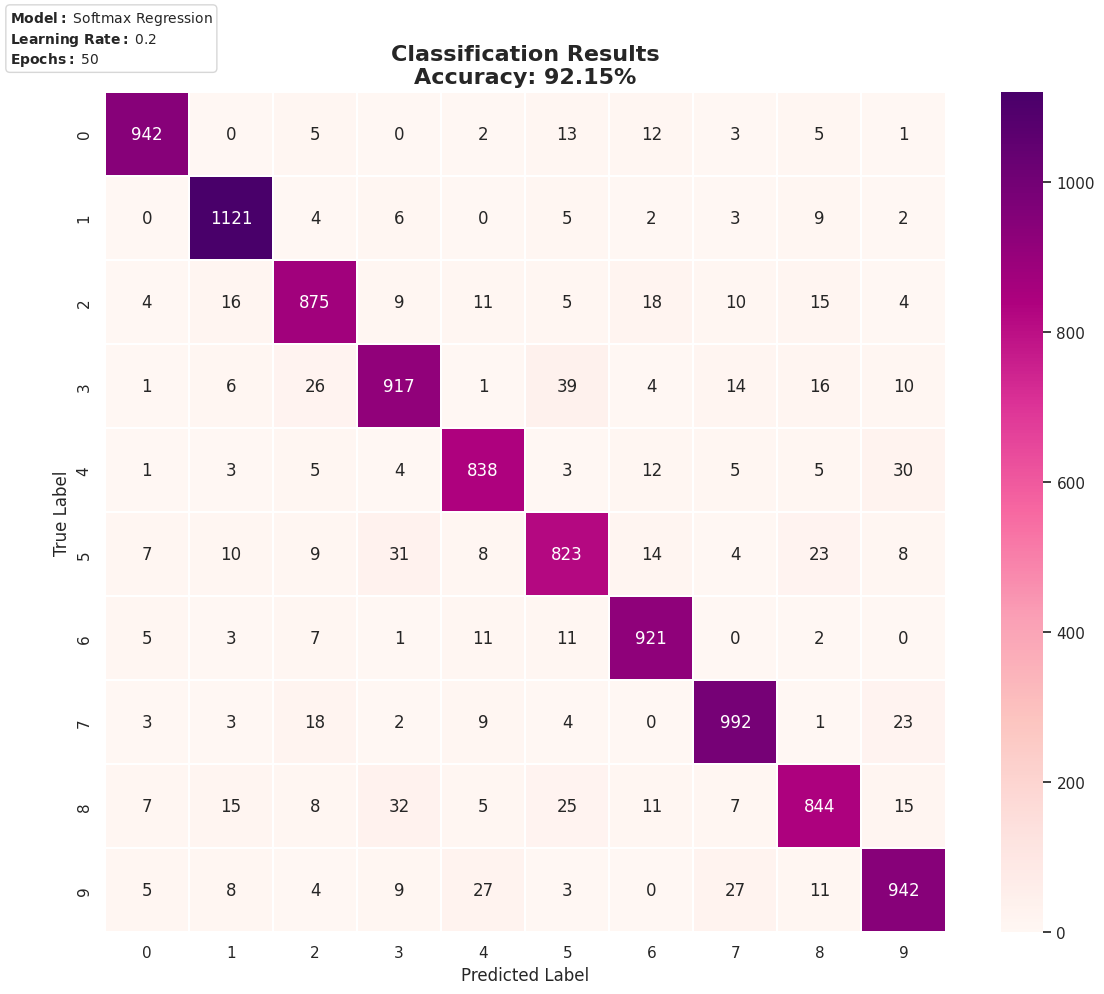


Comparison of Models:
Model 1 | Config: {'learning_rate': 0.1, 'num_epochs': 100, 'batch_size': 128} | Accuracy: 0.9220 | Avg Train Loss: 0.2544 | Avg Test Loss: 0.2903
   Sensitivities: ['0.9624', '0.9714', '0.9049', '0.8907', '0.9283', '0.8741', '0.9469', '0.9384', '0.8834', '0.9102']
Model 2 | Config: {'learning_rate': 0.05, 'num_epochs': 100, 'batch_size': 64} | Accuracy: 0.9208 | Avg Train Loss: 0.2542 | Avg Test Loss: 0.2901
   Sensitivities: ['0.9593', '0.9722', '0.9090', '0.8975', '0.9249', '0.8719', '0.9501', '0.9412', '0.8648', '0.9064']
Model 3 | Config: {'learning_rate': 0.01, 'num_epochs': 100, 'batch_size': 128} | Accuracy: 0.9176 | Avg Train Loss: 0.3352 | Avg Test Loss: 0.3392
   Sensitivities: ['0.9613', '0.9679', '0.8966', '0.8946', '0.9238', '0.8773', '0.9490', '0.9355', '0.8576', '0.9025']
Model 4 | Config: {'learning_rate': 0.2, 'num_epochs': 50, 'batch_size': 256} | Accuracy: 0.9215 | Avg Train Loss: 0.2700 | Avg Test Loss: 0.2959
   Sensitivities: ['0.9583', '0.

In [ ]:
# Define a list of different hyperparameter configurations to test
# Each configuration is a dictionary containing the learning rate, number of epochs, and batch size
configs = [
    {"learning_rate": 0.1, "num_epochs": 100, "batch_size": 128},  # Configuration 1
    {"learning_rate": 0.05, "num_epochs": 100, "batch_size": 64},  # Configuration 2
    {"learning_rate": 0.01, "num_epochs": 100, "batch_size": 128},  # Configuration 3
    {"learning_rate": 0.2, "num_epochs": 50, "batch_size": 256}  # Configuration 4
]

# Initialize an empty dictionary to store the results of each configuration for comparison
results = {}

progress_bar = tqdm(
    total=len(configs),  # Total number of iterations
    desc="Processing Configurations",  # Description of the task
    unit="config",  # Unit of measurement
    leave=True,  # Leave the progress bar displayed after completion
    position=0,  # Position of the progress bar (useful in multi-threaded applications)
    bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]"
)

# Iterate through each configuration and run the model with those hyperparameters
for idx, config in enumerate(configs):
    progress_bar.set_description(f"Processing Model {idx + 1} with config: {config}")  # Update description dynamically

    print(f"\nRunning Model {idx + 1} with config: {config}")  # Log the configuration being tested
    model = SoftmaxRegression(
        learning_rate=config["learning_rate"],  # Set the learning rate
        num_epochs=config["num_epochs"],  # Set the number of epochs
        batch_size=config["batch_size"]  # Set the batch size
    )

    # Load the MNIST dataset
    X_train, X_test, y_train, y_test = model.load_mnist()

    # Train the model and get the training and test losses
    train_losses, test_losses = model.train(X_train, y_train, X_test, y_test)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = model.calculate_accuracy(y_test, y_pred)

    # Calculate the confusion matrix and sensitivities
    conf_matrix, sensitivities = model.calculate_confusion_and_sensitivity(y_test, y_pred)

    # Store the results of the current configuration
    results[idx] = {
        "config": config,  # Store the configuration used
        "train_losses": train_losses,  # Store the training losses
        "test_losses": test_losses,  # Store the test losses
        "accuracy": accuracy,  # Store the accuracy
        "confusion_matrix": conf_matrix,  # Store the confusion matrix
        "sensitivities": sensitivities  # Store the sensitivities
    }

    # Log the accuracy and sensitivities of the current model
    print(f"Accuracy for Model {idx + 1}: {accuracy:.4f}")
    print(f"Sensitivities for Model {idx + 1}: {['{:.4f}'.format(s) for s in sensitivities]}")

    # Plot the loss curves and confusion matrix for the current model
    model.plot_loss(train_losses, test_losses, num_epochs=config["num_epochs"], lr=config["learning_rate"])
    model.plot_confusion_matrix(y_test, y_pred, num_epochs=config["num_epochs"], lr=config["learning_rate"])
    progress_bar.update(1)

# Compare the results of all models
print("\nComparison of Models:")
for idx, result in results.items():
    config = result["config"]  # Get the configuration of the model
    accuracy = result["accuracy"]  # Get the accuracy of the model
    avg_train_loss = np.mean(result["train_losses"])  # Calculate the average training loss
    avg_test_loss = np.mean(result["test_losses"])  # Calculate the average test loss
    sensitivities = result["sensitivities"]  # Get the sensitivities of the model

    # Log the comparison results
    print(f"Model {idx + 1} | Config: {config} | Accuracy: {accuracy:.4f} | "
          f"Avg Train Loss: {avg_train_loss:.4f} | Avg Test Loss: {avg_test_loss:.4f}")
    print(f"   Sensitivities: {[f'{s:.4f}' for s in sensitivities]}")

#### Performance Overview

All models demonstrate strong performance, with high classification accuracy across the board with values ranging above 90%. However, differences emerge in their respective training and test losses, as well as in the sensitivity of the models to individual digit classes.

#### Comparison of Hyperparameters

- **Learning Rate**: Models with higher learning rates generally perform comparably in terms of accuracy, though some slight differences in test loss are observed. The highest learning rate tends to allow faster convergence, but it can lead to larger fluctuations in performance across epochs. Conversely, lower learning rates, while leading to slower convergence, tend to result in higher training and test losses.

- **Epochs and Batch Size**: The number of epochs and batch size also significantly impact performance. Models with larger batch sizes and fewer epochs tend to achieve better results more efficiently, balancing both training time and model accuracy. On the other hand, models that use smaller batch sizes and more epochs tend to have more gradual improvements but can also suffer from longer training times and potentially higher losses.

#### Conclusion

The Softmax Regression models, in general, perform well on the MNIST dataset, demonstrating solid classification accuracy. Sensitivity levels for most digits are high, hovering around 90%, which indicates that the models are effectively identifying the majority of digit classes. However, slight variations in accuracy and loss arise based on hyperparameter configurations, such as learning rate, batch size, and the number of epochs.

Despite these variations, the changes in model performance resulting from adjustments to these hyperparameters are negligible. This can be attributed to several factors:

1. **Simplicity of Softmax Regression**: Softmax Regression is a relatively simple linear model compared to more complex architectures like neural networks. As such, it may have limited sensitivity to hyperparameter changes. In other words, it doesn't require extensive tuning of hyperparameters to achieve high performance on tasks like MNIST, which is a relatively simple problem. The model has already captured the necessary patterns in the data, and small adjustments in hyperparameters don't significantly affect its performance.

2. **Dataset Characteristics**: The MNIST dataset is well-known and relatively simple, with clear patterns in the handwritten digits that make it an ideal benchmark for classification models. The features in MNIST are straightforward and don't require intricate hyperparameter tuning to achieve high performance. As a result, even with different hyperparameter configurations, the model can still generalize well to unseen data without substantial changes in its predictive capabilities.

3. **Saturation of Model Performance**: Given that the MNIST task is a relatively low-complexity classification problem, the model performance quickly reaches a plateau once it has learned the basic patterns in the data. The Softmax Regression models are already quite effective at classifying the digits, so small adjustments to the learning rate, batch size, or number of epochs don't yield significant improvements. Once the model has converged to a good solution, additional tuning typically leads to diminishing returns.

4. **Hyperparameter Interactions**: In this case, the adjustments to hyperparameters—such as learning rate or batch size—might be compensating for each other, leading to similar overall performance. For example, while increasing the learning rate may allow the model to converge faster, it might also increase variance in the gradient updates. However, when paired with a larger batch size, this can stabilize the learning process, leading to similar performance to models that use smaller learning rates but more epochs. These compensating effects mean that the model’s final performance remains relatively consistent across different configurations.

Therefore, the lack of significant performance differences across hyperparameter settings is a result of the combination of the simplicity of the Softmax Regression model, the characteristics of the MNIST dataset, and the fact that the model has already learned to classify the digits well even with suboptimal configurations. For further improvements, more complex models or advanced techniques would likely be required.


## PART C: Linear Regression

### **Thought Process:**

**Formulating the Problem as a Linear Regression Task:**<br>
The task at hand is the classification of handwritten digits, which traditionally represents a classification problem. However, linear regression is generally used for predicting continuous variables, not categorical ones. To adapt linear regression to this context, we frame it as a multi-output regression problem, where the objective is to predict the digit labels as numerical values.

A significant challenge arises because the output values are discrete integers (ranging from 0 to 9), differing from the continuous outputs in typical regression settings.

To address this, we:
  - Apply one-hot encoding to the target labels, transforming each digit into a binary vector where the position corresponding to the correct digit is set to 1 (e.g., the digit 1 becomes [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]).
  - Conceptualize the problem as "multi-class regression," where the model predicts the one-hot encoded vector for each digit.
  - Represent each image as a feature vector consisting of 784 pixel intensities (one for each pixel).
  
**Evaluating Linear Regression on the Test Set:**<br>
  - Performance is assessed by how effectively the model predicts digit labels on the test set.
  - Since linear regression outputs continuous values, a thresholding approach is used to map the predictions back to discrete classes.
  - Evaluation metrics may include accuracy (as a classification metric) along with potential metrics such as mean squared error or cross-entropy loss (more common in regression tasks).
  - Given that linear regression is not ideal for categorical tasks, especially with the complexity and high dimensionality of handwritten digits, we expect its performance to be subpar.

### **Plan for Implementation:**

**Data Preparation:**
  - Load the MNIST dataset.
  - Flatten the 28x28 pixel images into 784-dimensional vectors.
  - One-hot encode the digit labels (0-9).

**Training the Linear Regression Model:**
  - Utilize the least squares method to train the linear regression model on the flattened image data.
  - The weight matrix is computed using the formula:
  $$
  W = (X^T X)^{-1} X^T y
  $$
  where $X$ represents the matrix of input images size  $N \times 784$, and $y$ is the matrix of one-hot encoded labels.

**Performance Evaluation:**<br>
  - Use the trained model to predict digit labels on the test set.
  - Convert the continuous predicted values to discrete labels by selecting the class with the highest predicted value.
  - Compute classification accuracy by comparing the predicted labels with the actual labels.

### **Linear Regression Approach:**

- **Advantages:**
   - Simplicity in both implementation and concept.
   - Fast training on small datasets.
  
- **Disadvantages:**
   - Linear regression is fundamentally unsuitable for classification tasks.
   - It presupposes a linear relationship between the features and the target, which is unrealistic for image data such as handwritten digits.
   - The model may fail to generalize effectively, leading to suboptimal accuracy when compared to more appropriate classification algorithms like logistic regression, support vector machines, or neural networks.


### **MulticlassLinearRegression - Model Overview**

- `self.weights`: Stores the learned weights after training.
- `self.training_errors`: Tracks errors during training (not actively used in the code).
- `self.test_errors`: Tracks errors during testing (not actively used in the code).

**Fit Method (`fit`)**:
- **Purpose**: This method trains the model using the normal equation for linear regression.
- **Formula**: The weights are computed using the formula:
  $$
  w = (X^T X)^{-1} X^T y
  $$
  Where $X$ is the feature matrix (size: $n_{\text{samples}} \times n_{\text{features}}$) and $y$ is the one-hot encoded label matrix (size: $n_{\text{samples}} \times n_{\text{classes}}$).
- **Procedure**:
  - It calculates the pseudo-inverse of $X^T X$, multiplies it by $X^T$, and then multiplies by the one-hot encoded labels $y$ to obtain the weight matrix `self.weights`.
   
3. **Predict Method (`predict`)**:
   - **Purpose**: This method makes predictions for the input data based on the learned weights.
   - **Procedure**:
     - Computes the scores by multiplying the feature matrix $X$ by the weight matrix $w$.
     - Uses `np.argmax` to select the class with the highest score for each sample, thus predicting the class label.

4. **Predict Proba Method (`predict_proba`)**:
   - **Purpose**: This method returns the raw regression scores (before applying `argmax`), which can be useful for evaluating errors or understanding the confidence of predictions.
   - **Procedure**:
     - Computes the scores by multiplying the feature matrix $X$ by the weight matrix $w$, without applying any thresholding or argmax.
   
### **Evaluation Function (`evaluate_model`)**:

This function calculates and prints the classification accuracy of the model. It takes the true labels (`y_true`) and the predicted labels (`y_pred`) as inputs, calculates the proportion of correct predictions, and prints the accuracy.

### **Accuracy Score Function (`accuracy_score`)**:

This function calculates the classification accuracy as the ratio of correct predictions to the total number of samples. It returns the accuracy as a float.


### **Potential Improvements or Notes**:
- **Error Tracking**: The `training_errors` and `test_errors` attributes are initialized but not actively used. Implementing error tracking could provide insight into how well the model generalizes.
- **Regularization**: The model uses the normal equation for fitting, which may lead to overfitting in cases with high-dimensional data (like MNIST). Regularization techniques (e.g., L2 regularization) might improve performance.
- **Model Comparison**: While the `plot_comparison` function is defined, it's not invoked in the provided code. Adding functionality to compare multiple models might be useful for evaluating different algorithms.

This model is a basic implementation of a multiclass linear regression algorithm, suitable for understanding how linear regression can be applied to classification tasks, though it may struggle with complex datasets due to the limitations of linear regression for classification.

In [ ]:
class MulticlassLinearRegression:
    def __init__(self):
        self.weights = None
        self.training_errors = []
        self.test_errors = []

    def fit(self, X, y):
        """
        Fit linear regression using normal equation: w = (X^T X)^(-1) X^T y
        Args:
            X: Training features (n_samples, n_features)
            y: One-hot encoded labels (n_samples, n_classes)
        """
        # Calculate weights using normal equation
        self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X):
        """
        Predict class labels for samples in X
        Returns class with highest regression value
        """
        scores = X @ self.weights
        return np.argmax(scores, axis=1)

    def predict_proba(self, X):
        """
        Get raw regression values (before argmax)
        Useful for calculating errors
        """
        return X @ self.weights

def evaluate_model(y_true, y_pred, model_name="Linear Regression"):
    """Calculate and print model performance metrics"""
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples

    print(f"\n{model_name} Results:")
    print(f"Classification Accuracy: {accuracy:.4f}")
    return accuracy

def plot_comparison(accuracies, model_names):
    """Plot bar chart comparing model accuracies"""
    plt.figure(figsize=(10, 6))
    sns.barplot(x=model_names, y=accuracies)
    plt.title("Model Comparison: Classification Accuracy", fontsize=14)
    plt.ylabel("Accuracy", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def accuracy_score(y_true, y_pred):
    """
    Calculate the classification accuracy as the proportion of correct predictions.

    Args:
        y_true: True class labels (n_samples,)
        y_pred: Predicted class labels (n_samples,)

    Returns:
        accuracy: Classification accuracy as a float
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

Loading MNIST dataset...
Training linear regression model...

Linear Regression Results:
Classification Accuracy: 0.8539


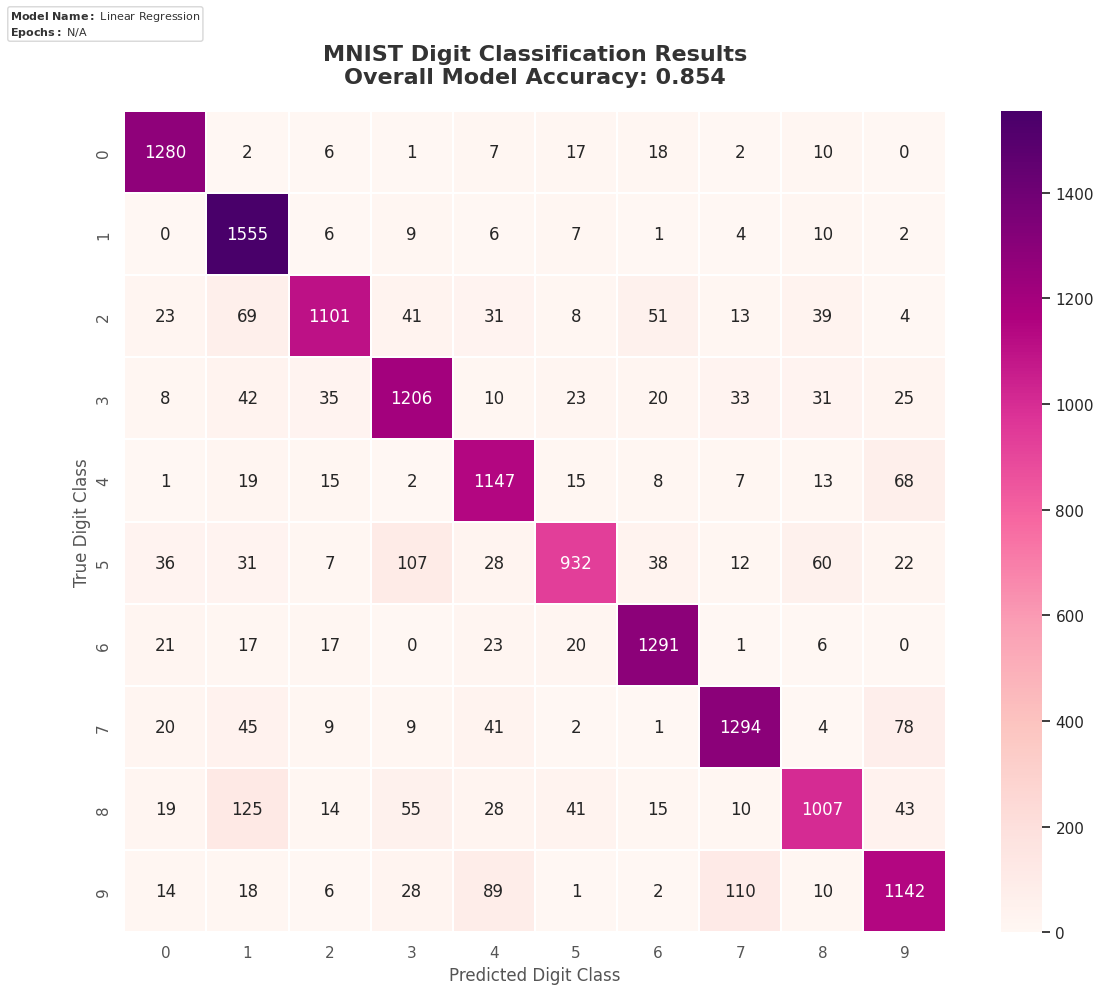

CLASSIFIER ANALYSIS FOR: 'Linear Regression':

PRECISION STATISTICS:
Digit 0 Precision: 0.9001
Digit 1 Precision: 0.8086
Digit 2 Precision: 0.9054
Digit 3 Precision: 0.8272
Digit 4 Precision: 0.8135
Digit 5 Precision: 0.8743
Digit 6 Precision: 0.8934
Digit 7 Precision: 0.8708
Digit 8 Precision: 0.8462
Digit 9 Precision: 0.8251

RECALL STATISTICS:
Digit 0 Recall: 0.9531
Digit 1 Recall: 0.9719
Digit 2 Recall: 0.7978
Digit 3 Recall: 0.8416
Digit 4 Recall: 0.8857
Digit 5 Recall: 0.7321
Digit 6 Recall: 0.9248
Digit 7 Recall: 0.8609
Digit 8 Recall: 0.7421
Digit 9 Recall: 0.8042

F1-SCORE METRICS BY DIGIT CLASS:
Digit 0 F1-Score: 0.9259
Digit 1 F1-Score: 0.8828
Digit 2 F1-Score: 0.8482
Digit 3 F1-Score: 0.8343
Digit 4 F1-Score: 0.8481
Digit 5 F1-Score: 0.7969
Digit 6 F1-Score: 0.9088
Digit 7 F1-Score: 0.8658
Digit 8 F1-Score: 0.7907
Digit 9 F1-Score: 0.8146

ACCURACY BY DIGIT CLASS:
Digit 0 Accuracy: 0.9531
Digit 1 Accuracy: 0.9719
Digit 2 Accuracy: 0.7978
Digit 3 Accuracy: 0.8416
Digit 4 Acc

In [ ]:
# Load data
X_train, X_test, y_train, y_test, y_train_orig, y_test_orig = prepare_data()

# Train linear regression model
print("Training linear regression model...")
linear_regression_model = MulticlassLinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions
lr_y_pred = linear_regression_model.predict(X_test)

# Evaluate and visualize results
lr_accuracy = evaluate_model(y_test_orig, lr_y_pred)

# Plot confusion matrix
model_details = {
    'model_name': 'Linear Regression',
}
plot_confusion_matrix(y_test_orig, lr_y_pred, model_details)
print_classifier_analysis(y_test_orig, lr_y_pred, model_name="Linear Regression")

####  **Linear Regression Results**
The results of the linear regression model on the MNIST dataset reveal a mixed performance, with notable strengths and weaknesses across different digit classes. The model performs well on simpler, more distinct digits such as zero, one, and two, demonstrating high precision and recall, indicating effective classification. Specifically, digit one shows particularly high recall, although its precision is slightly lower, suggesting that the model identifies this digit well but occasionally misclassifies it as another. However, the model struggles with more complex digits like five, eight, and nine, which exhibit lower recall and F1-scores, especially for digit five, where recall is notably reduced. These difficulties are likely due to the inherent visual similarities between these digits and others, which linear regression, with its limited ability to model non-linear decision boundaries, cannot distinguish effectively. The overall classification accuracy reflects the model’s general competence but also highlights its limitations in handling the subtle and overlapping features of handwritten digits. Consequently, while linear regression may serves as a solid baseline, its performance on more complex digit classes underscores the necessity for more advanced models to achieve higher classification accuracy and better generalization.

####  **Comparison of Linear Regression, Perceptron, and Softmax Regression for MNIST Classification**
When comparing linear regression, the perceptron algorithm, and softmax regression for the task of MNIST digit classification, it becomes clear that each model has unique strengths and weaknesses, particularly in their ability to handle complex data patterns inherent in the dataset.

**Linear Regression**:
Linear regression is the simplest of the three models and is based on the assumption that there is a linear relationship between the input features (pixel values) and the output (digit class). While it can be trained quickly and easily, its simplicity is both a strength and a significant limitation. The major weakness of linear regression lies in its inability to capture non-linear patterns in the data. Handwritten digits exhibit complex variations in shape, size, and orientation, which cannot be effectively modeled with a linear decision boundary. This results in poor classification performance, particularly for digits with similar visual features. Additionally, the squared error loss function used in linear regression does not effectively penalize misclassifications in classification tasks, leading to suboptimal decisions. Therefore, while linear regression can serve as a baseline model, it is ill-suited for MNIST's complexity.

**Perceptron Algorithm**:
The perceptron algorithm, in contrast, uses a linear decision boundary to separate each digit class in a one-vs-all (OvA) fashion. While this allows the model to extend linear regression to multi-class classification, the perceptron still operates within the confines of linear decision boundaries. Its strength lies in its ability to adjust weights incrementally, making it capable of learning from the data over time. However, its reliance on linear boundaries limits its capacity to effectively separate complex data patterns, especially when dealing with similar digits, such as 5, 8, and 9. This results in reduced accuracy for certain classes, even though the perceptron can achieve decent overall accuracy (typically above 80%). The perceptron model also struggles with noisy data and overlapping classes, as its learning rule is based on simple binary updates rather than a probabilistic approach. Despite these limitations, the perceptron offers a significant improvement over linear regression due to its ability to handle multi-class classification and incremental learning.

**Softmax Regression**:
Softmax regression, also known as multinomial logistic regression, improves upon both linear regression and the perceptron by modeling the probabilities of each class rather than relying on a binary decision boundary for each class. By using the softmax function, which transforms the raw output scores into class probabilities, softmax regression offers a more nuanced understanding of the data. This model performs significantly better on MNIST than linear regression or the perceptron, achieving higher classification accuracy (typically above 90%). The softmax function allows the model to assign higher confidence to the correct class and lower confidence to incorrect ones, which aids in distinguishing between visually similar digits. However, like the perceptron, softmax regression still operates with linear decision boundaries, meaning it cannot fully capture non-linear relationships. Despite this, softmax regression’s ability to model probabilities and output more meaningful decision scores gives it a clear advantage over both linear regression and the perceptron.

**Conclusion:**
In terms of overall effectiveness for the MNIST classification task, **softmax regression** is the best model among the three, as it strikes a balance between simplicity and performance. While it still uses linear decision boundaries, its probabilistic approach allows for more nuanced predictions and higher accuracy, especially when compared to linear regression and the perceptron. **The perceptron** provides a useful improvement over linear regression by handling multi-class classification, but its performance is limited by its linearity and struggles with overlapping classes. **Linear regression**, though fast and simple, is not suited for complex, non-linearly separable data and thus performs poorly on MNIST. However, all three models are outperformed by more advanced models, such as neural networks, which can learn non-linear patterns and achieve even higher levels of accuracy.